In [1]:
import numpy as np
from matplotlib.pyplot import subplots

Matplotlib is building the font cache; this may take a moment.


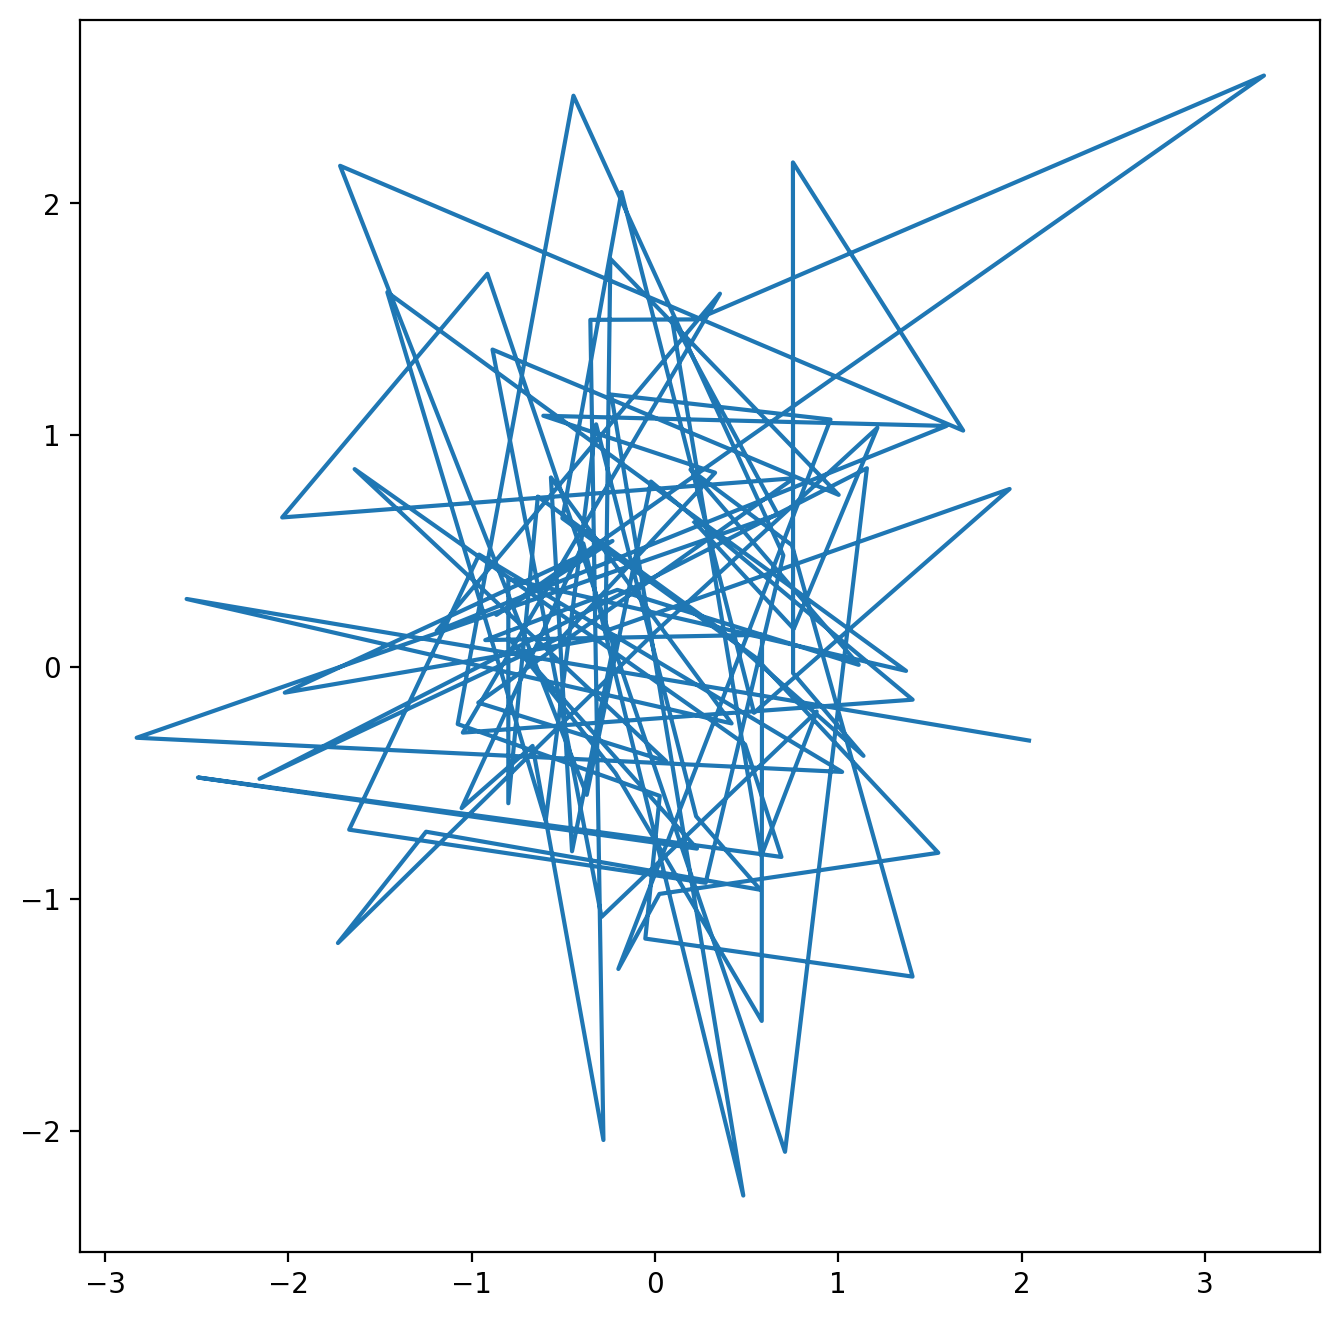

In [8]:
fig, ax = subplots(figsize=(8, 8))
rng = np.random.default_rng(3)
x = rng.standard_normal(100)
y = rng.standard_normal(100)
ax.plot(x, y)

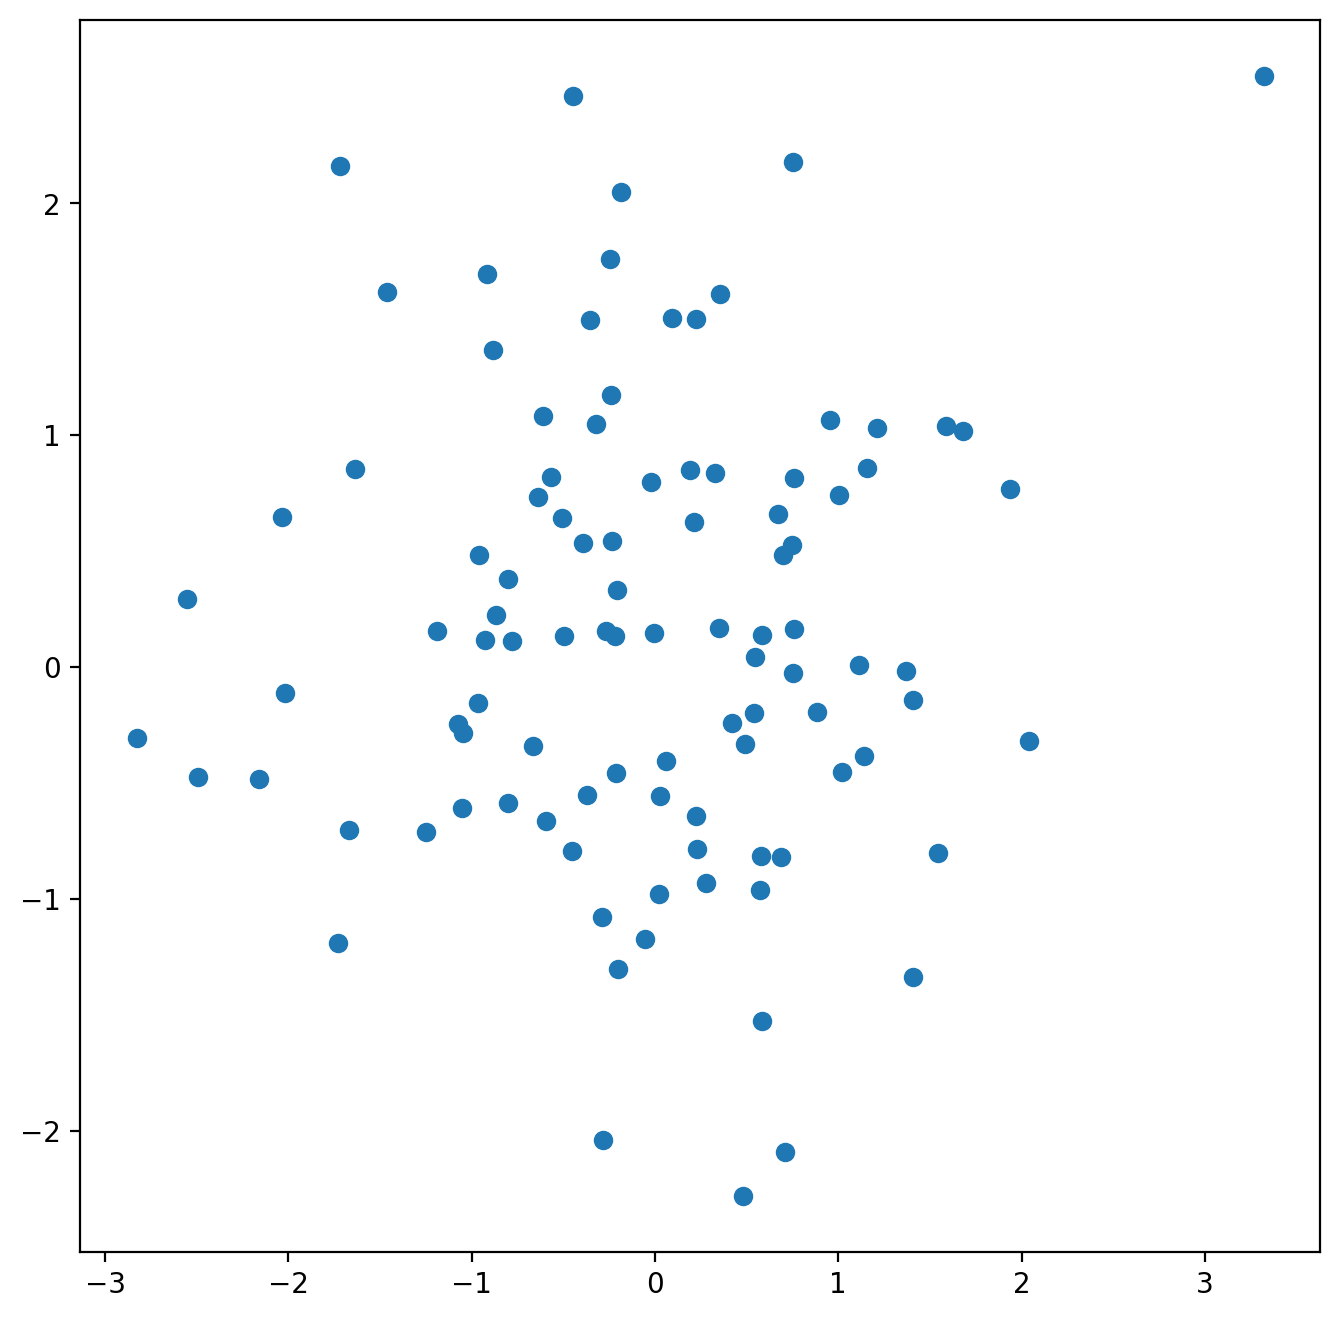

In [12]:
fig, ax = subplots(figsize=(8, 8))
ax.plot(x, y, 'o')

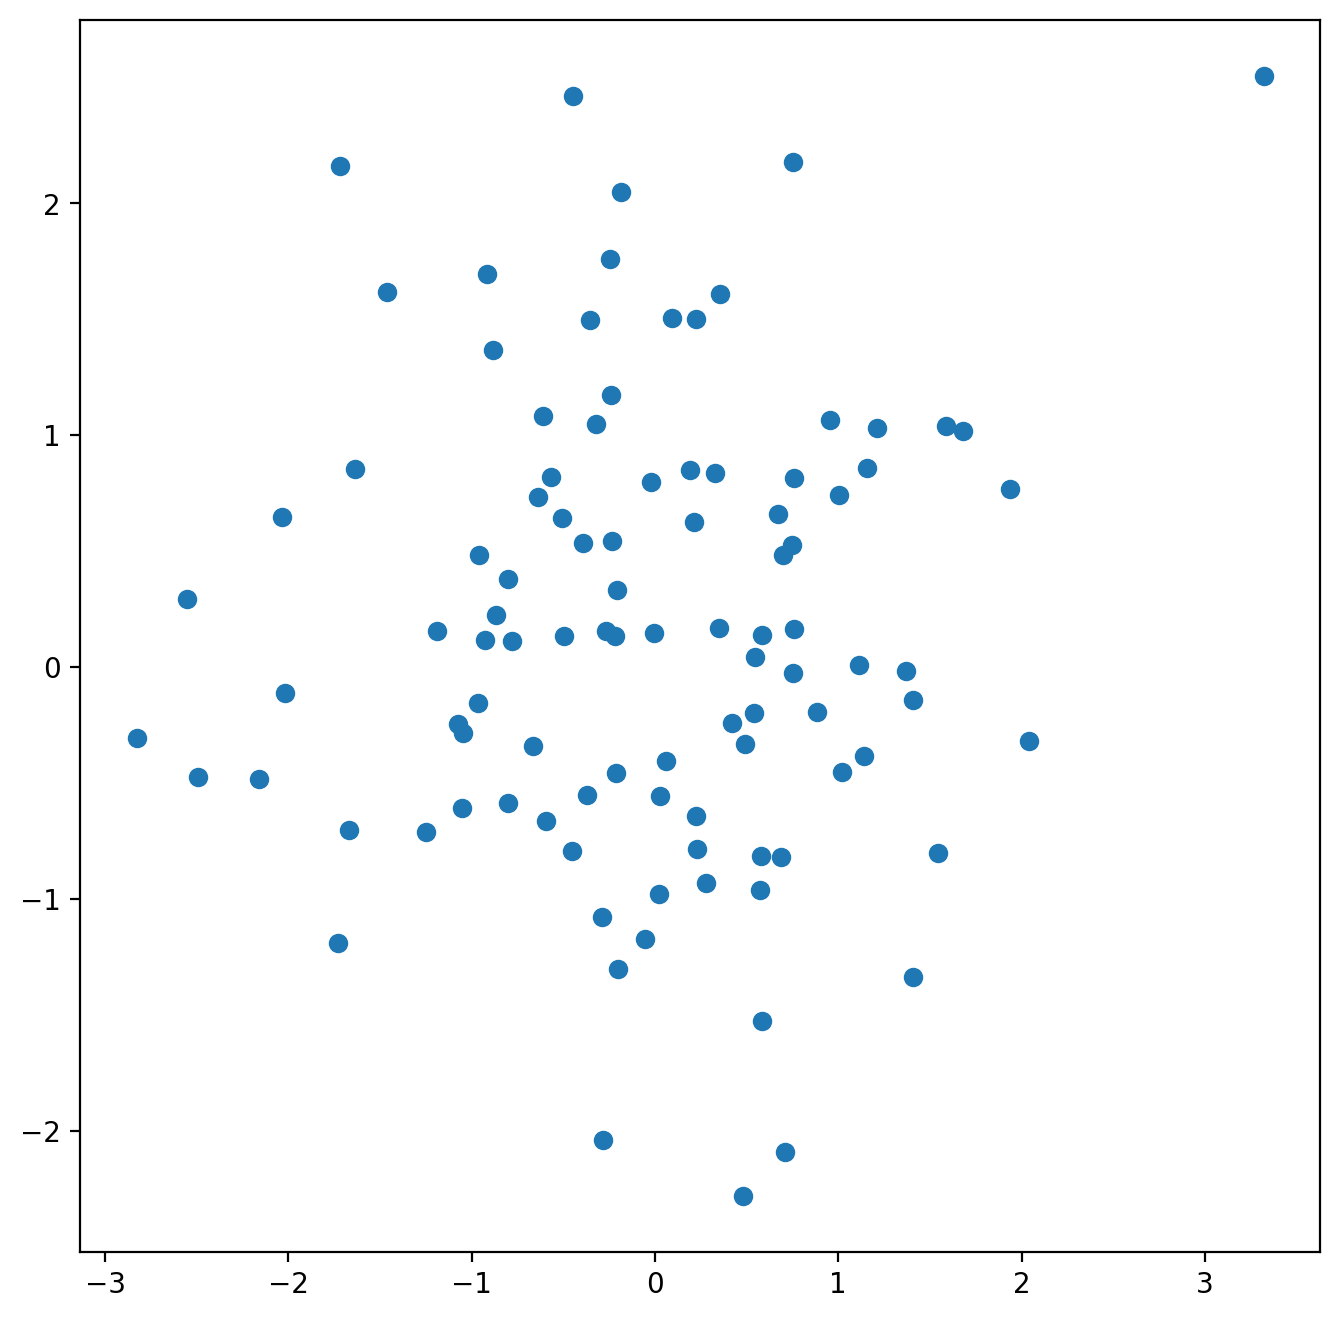

In [16]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y);

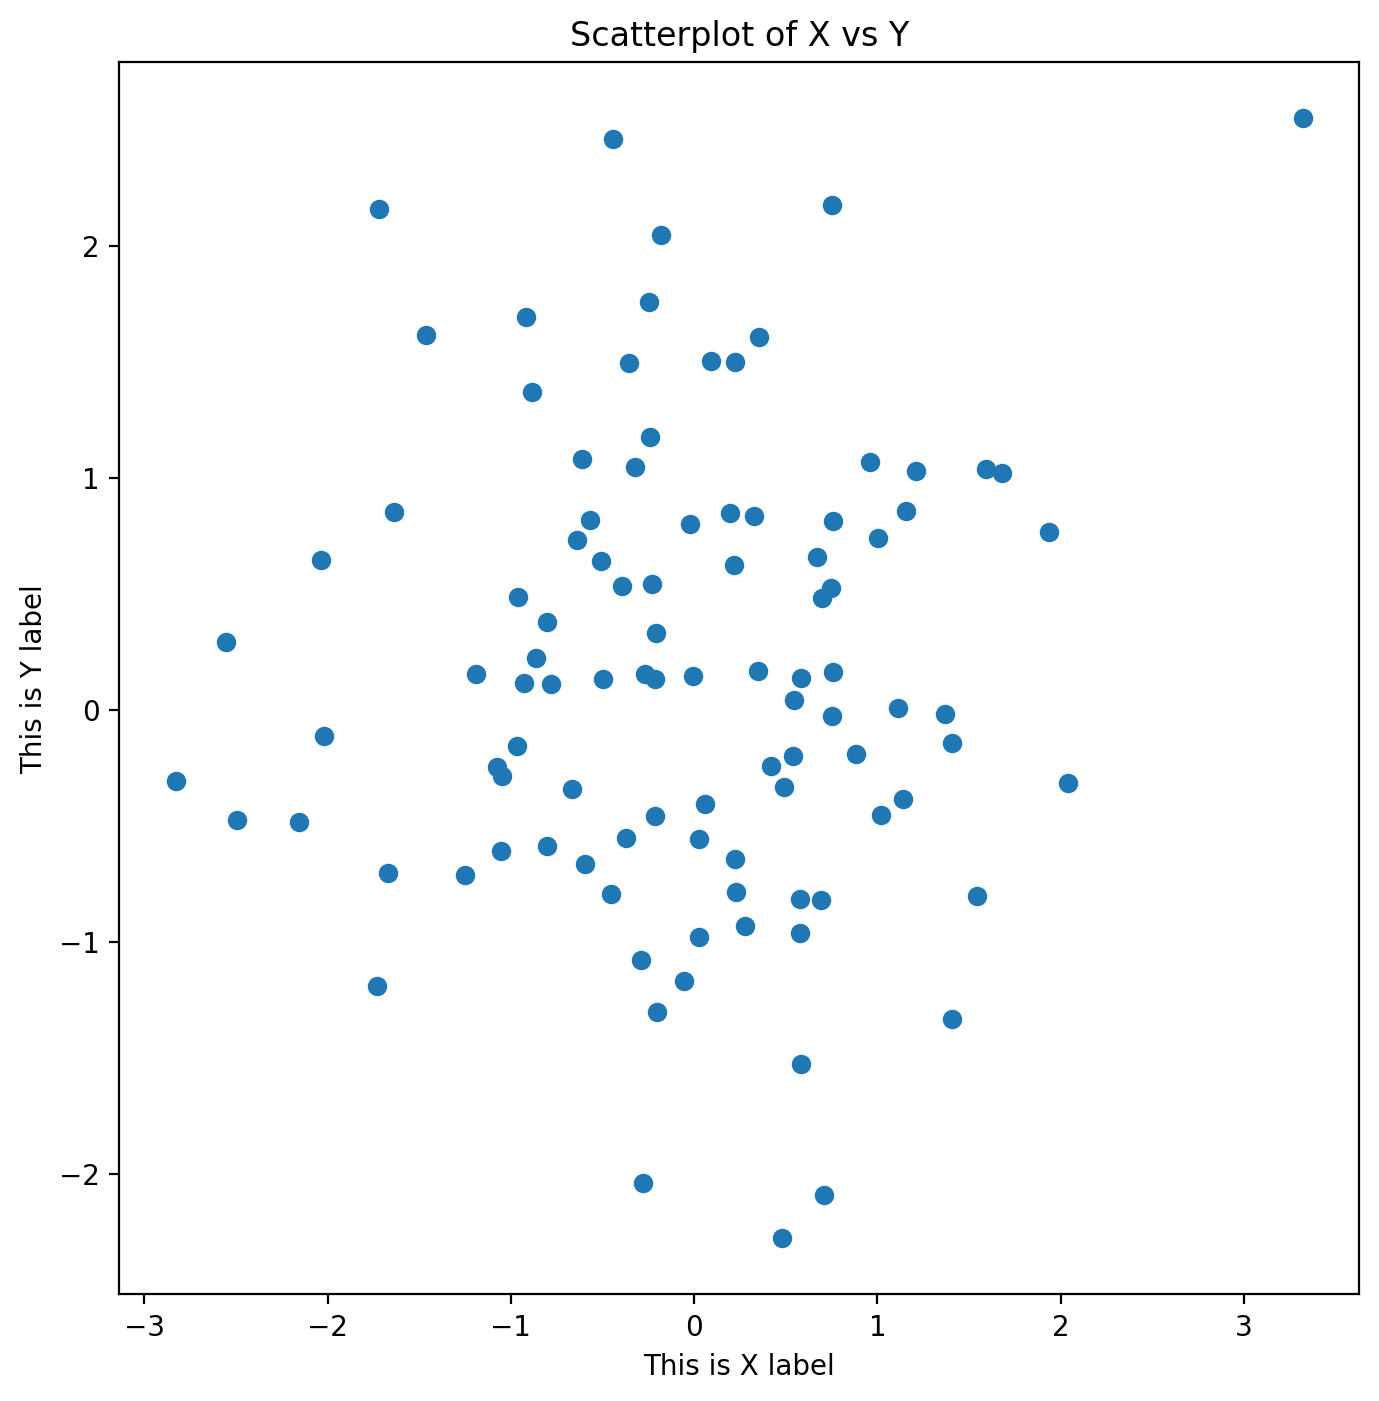

In [19]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y)
ax.set_xlabel("This is X label")
ax.set_ylabel("This is Y label")
ax.set_title("Scatterplot of X vs Y");

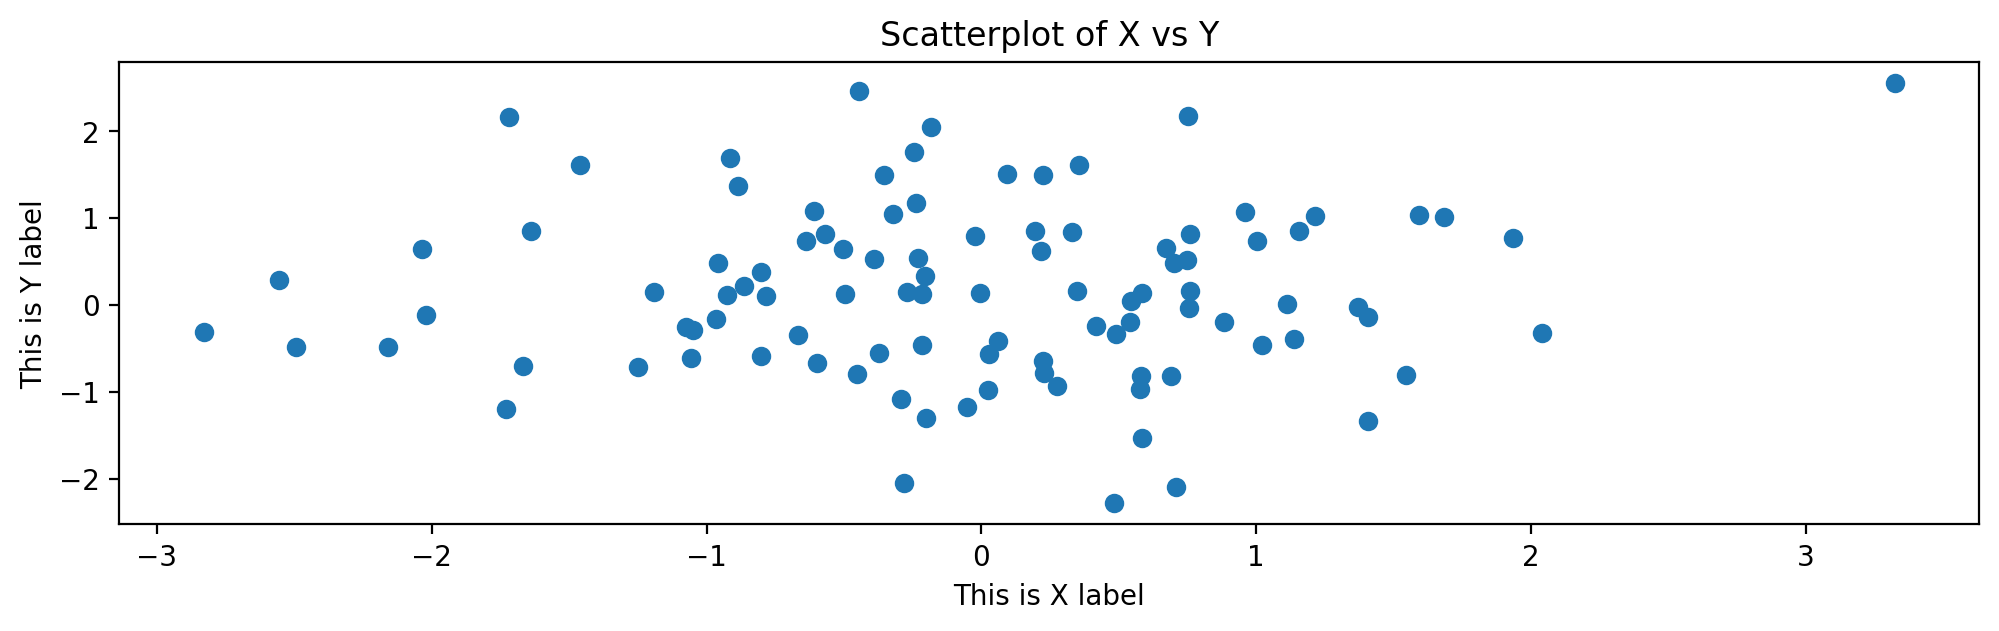

In [20]:
fig.set_size_inches(12,3)
fig

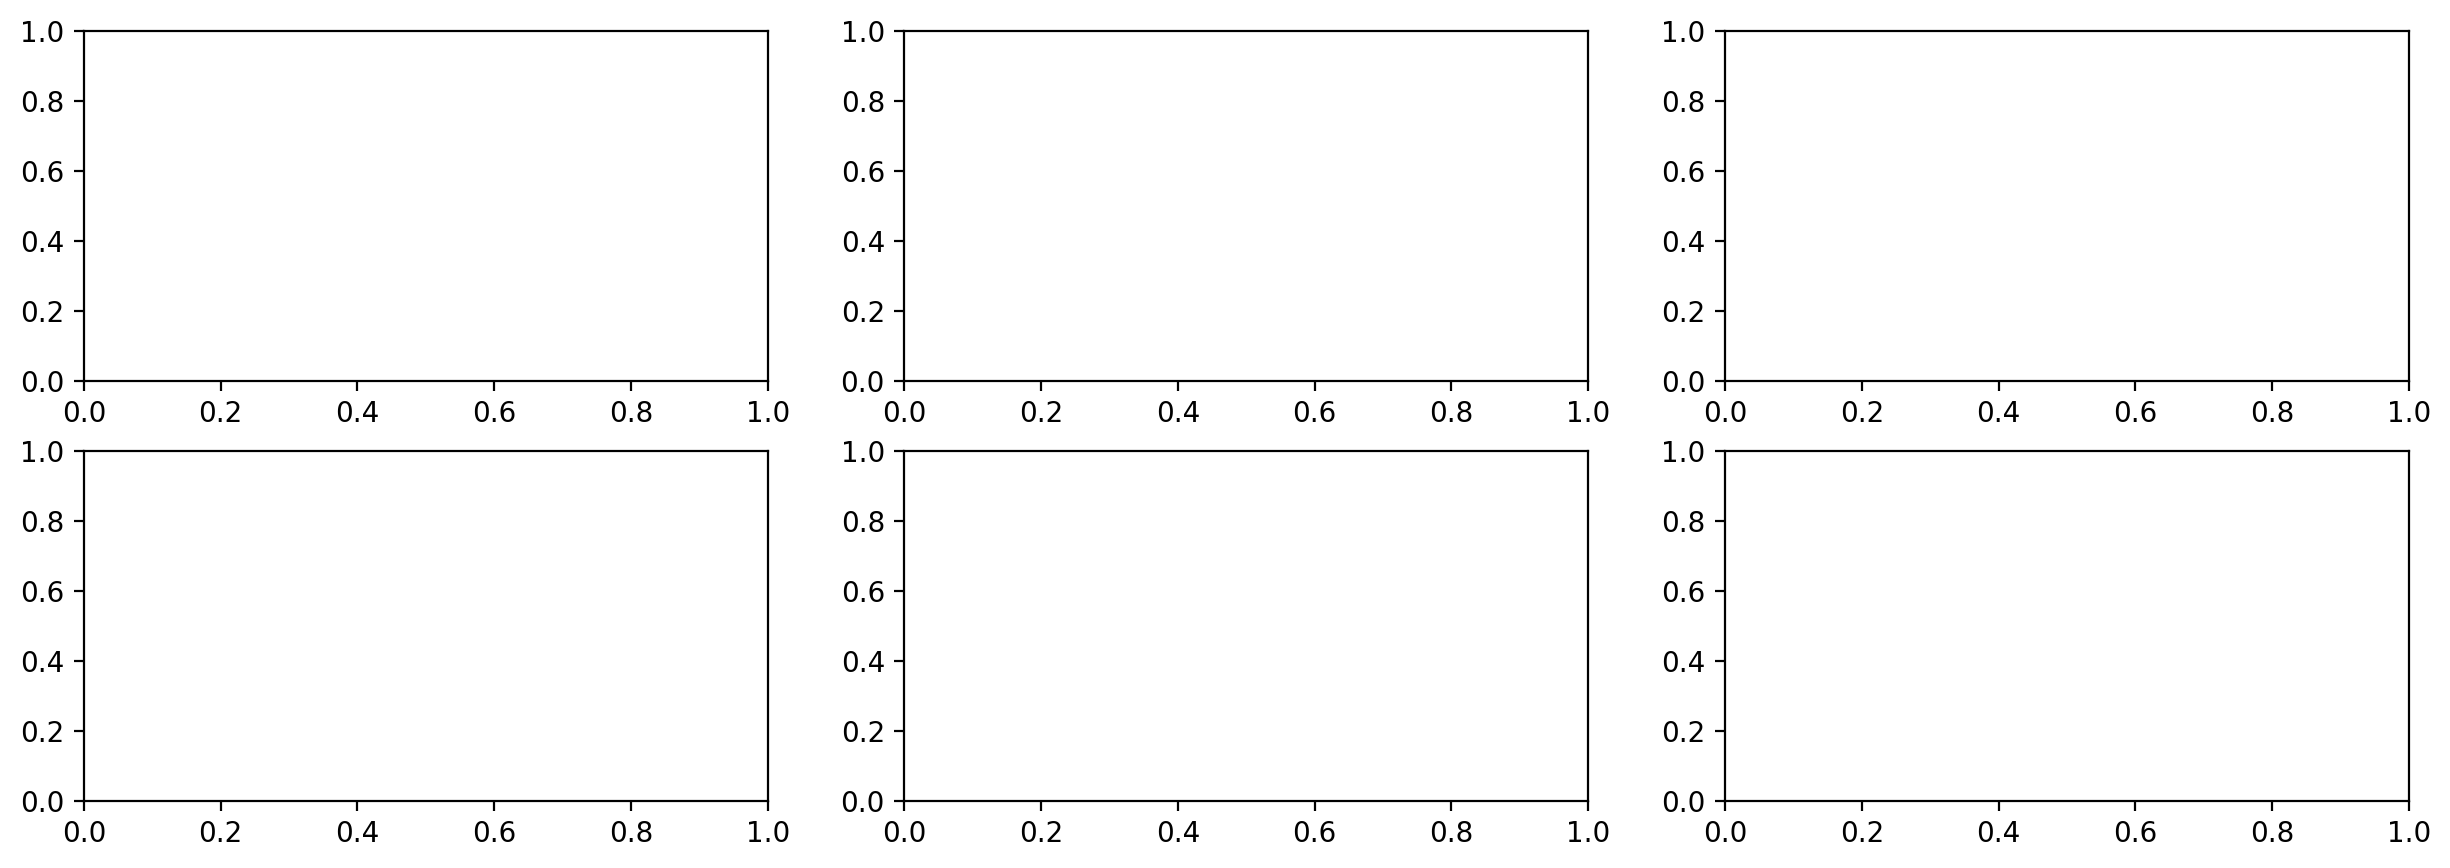

In [21]:
fig, axes = subplots(nrows=2,
                     ncols=3,
                     figsize=(15, 5))

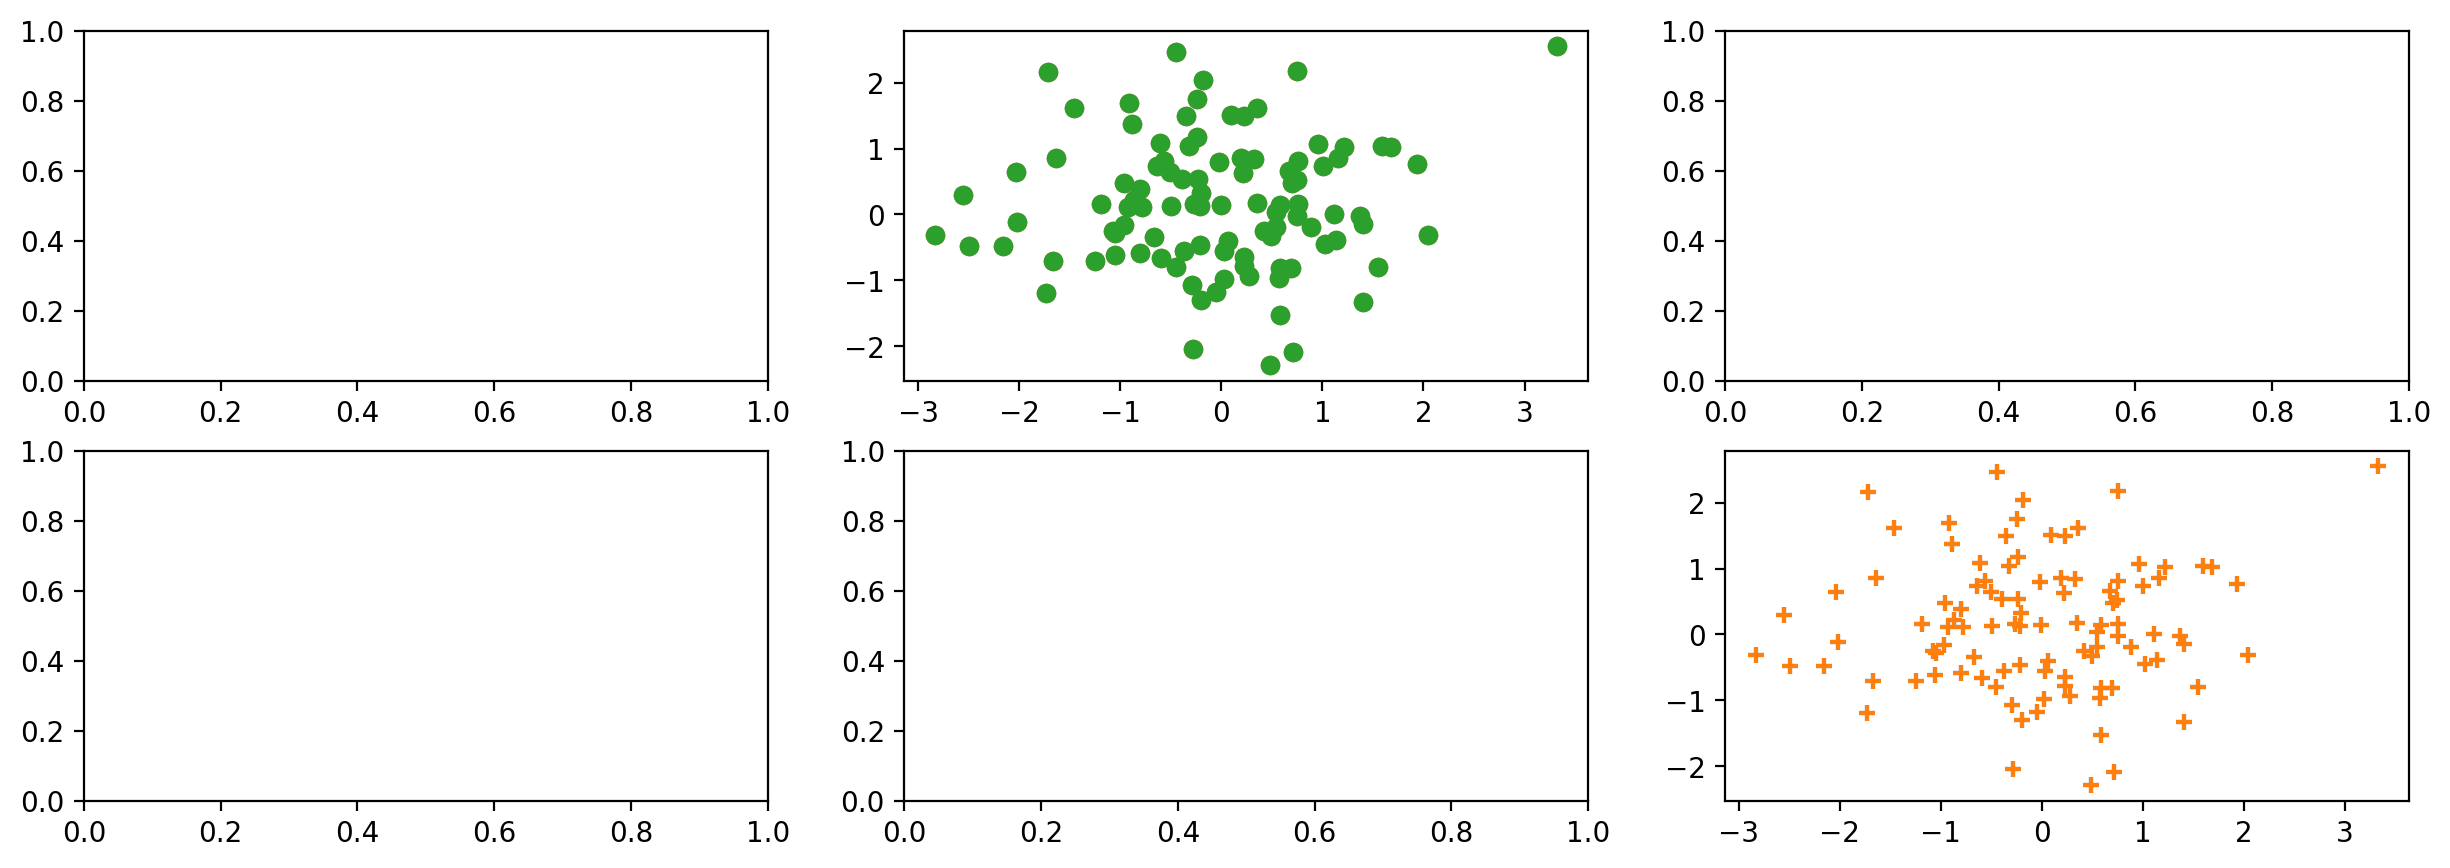

In [24]:
axes[0, 1].plot(x, y, 'o')
axes[1, 2].scatter(x, y, marker='+')
fig

In [25]:
fig.savefig("Figure.png", dpi=400)
fig.savefig("Figure.pdf", dpi=200);

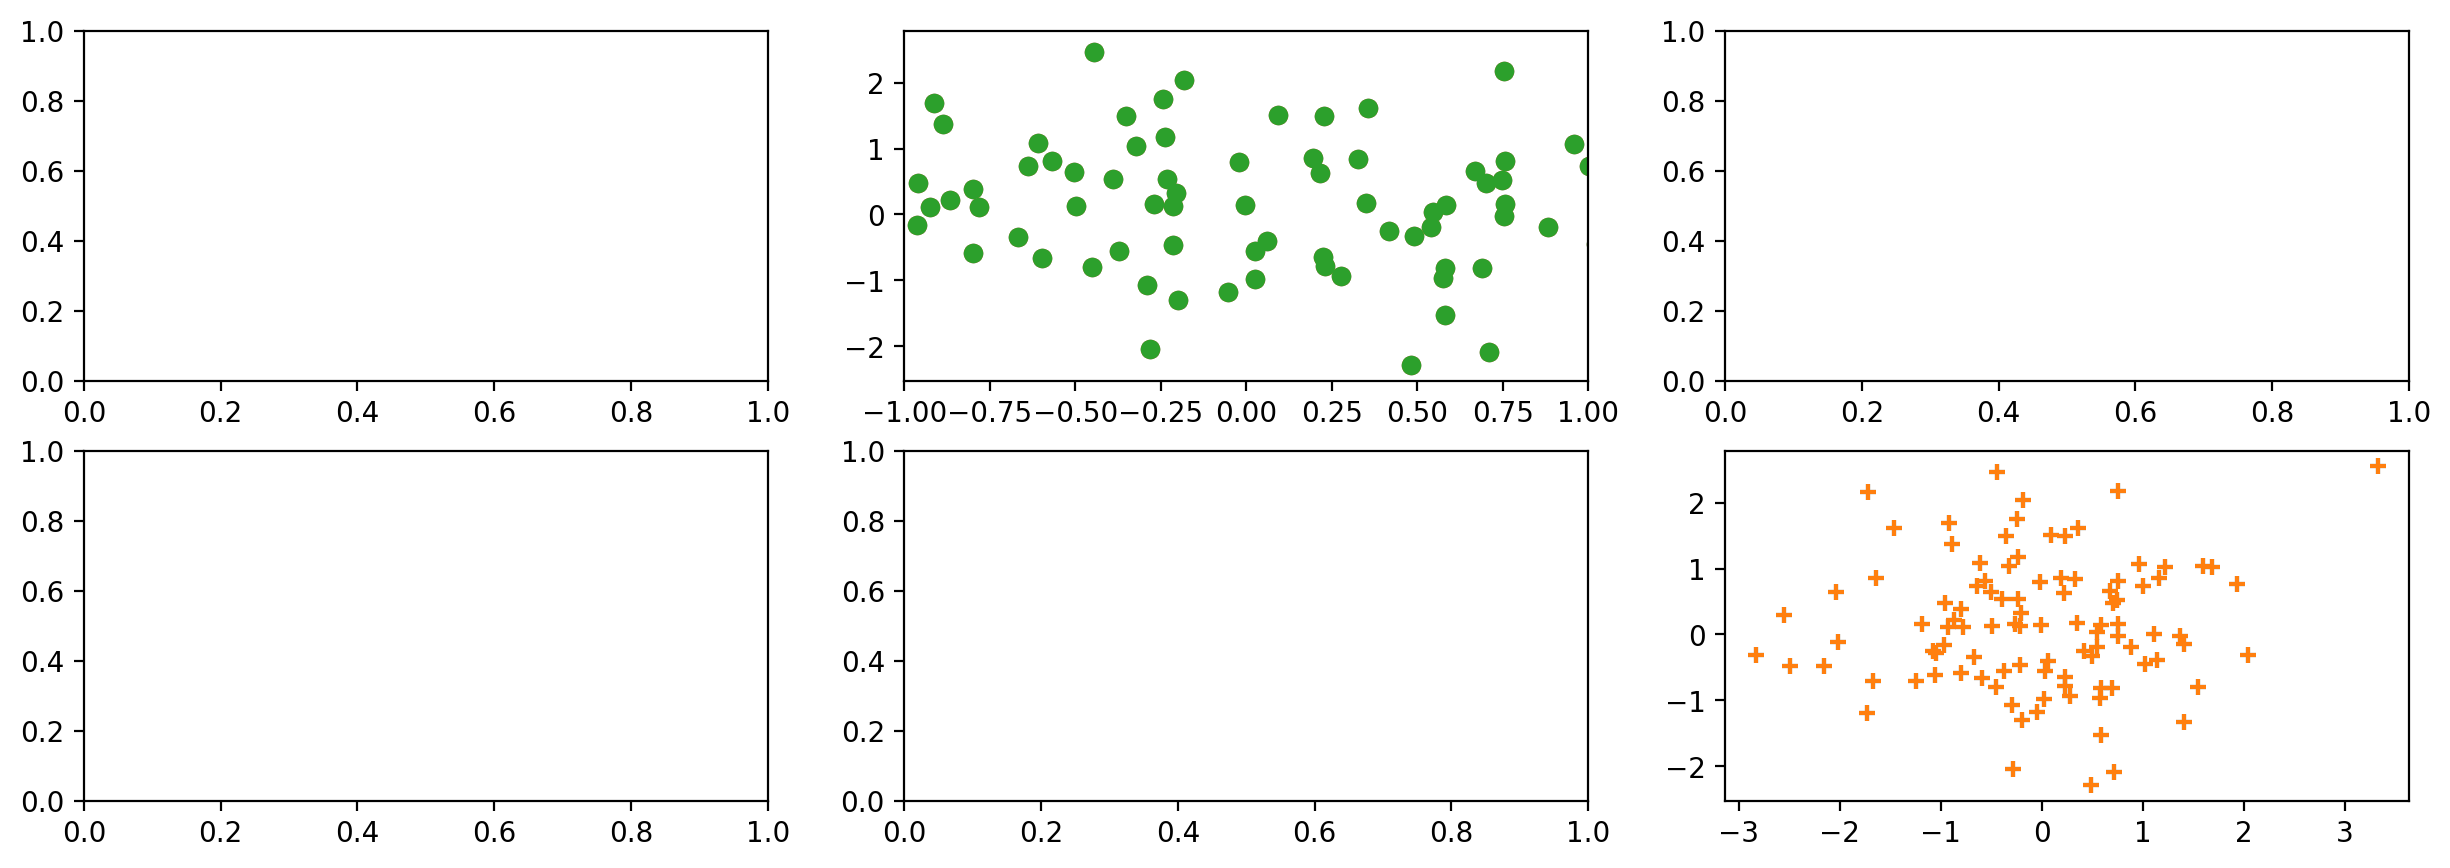

In [26]:
axes[0, 1].set_xlim([-1, 1])
fig.savefig("Figure_updated.jpg")
fig

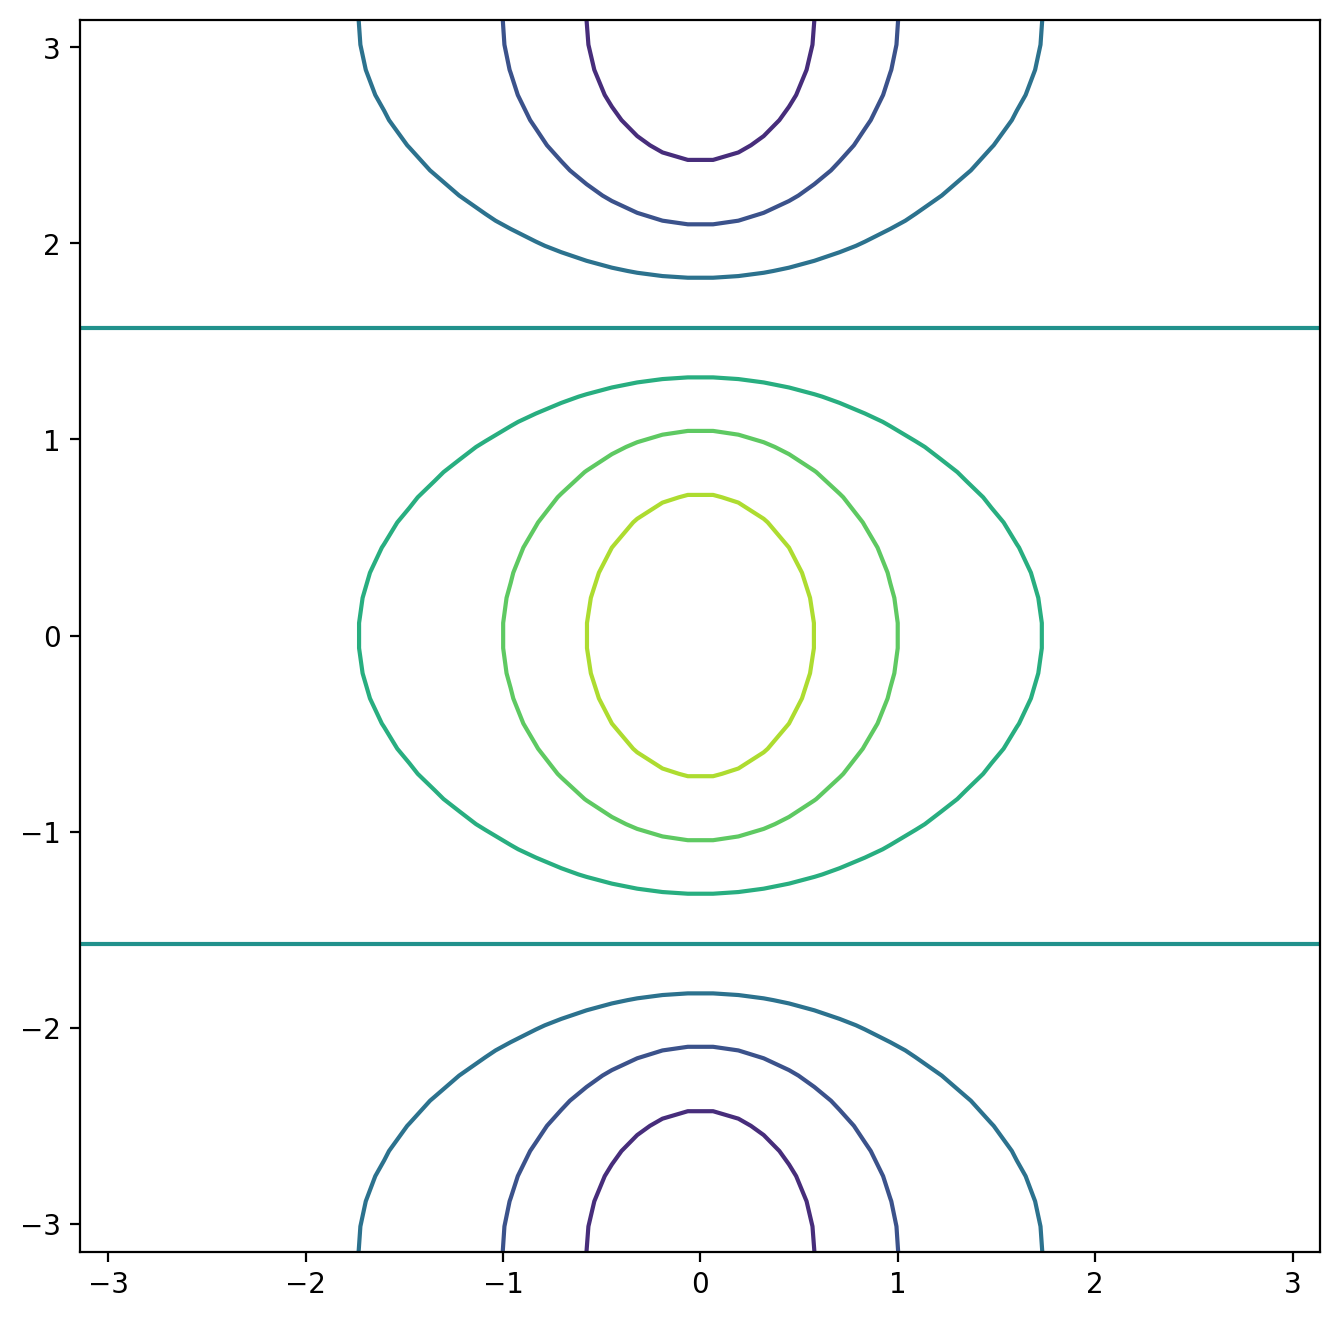

In [27]:
fig, ax = subplots(figsize=(8, 8))
x = np.linspace(-np.pi, np.pi, 50)
y = x
f = np.multiply.outer(np.cos(y), 1 / (1 + x**2))
ax.contour(x, y, f);

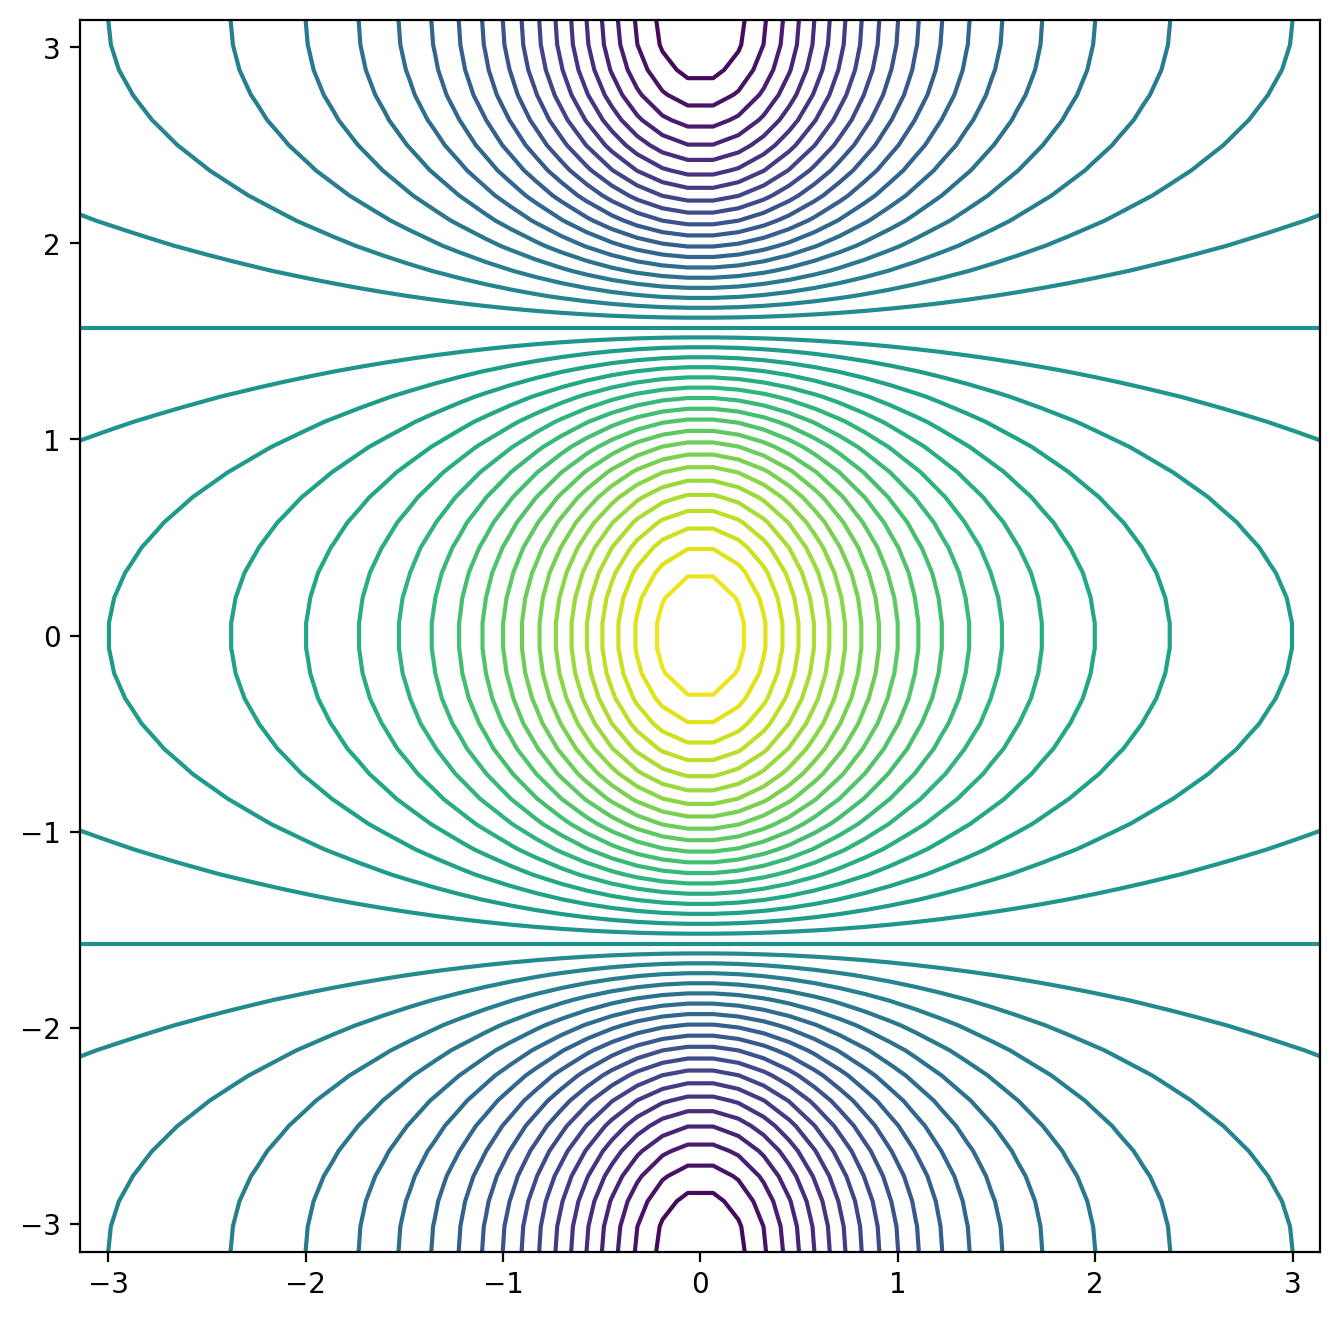

In [33]:
fig, ax = subplots(figsize=(8, 8))
ax.contour(x, y, f, levels=45);

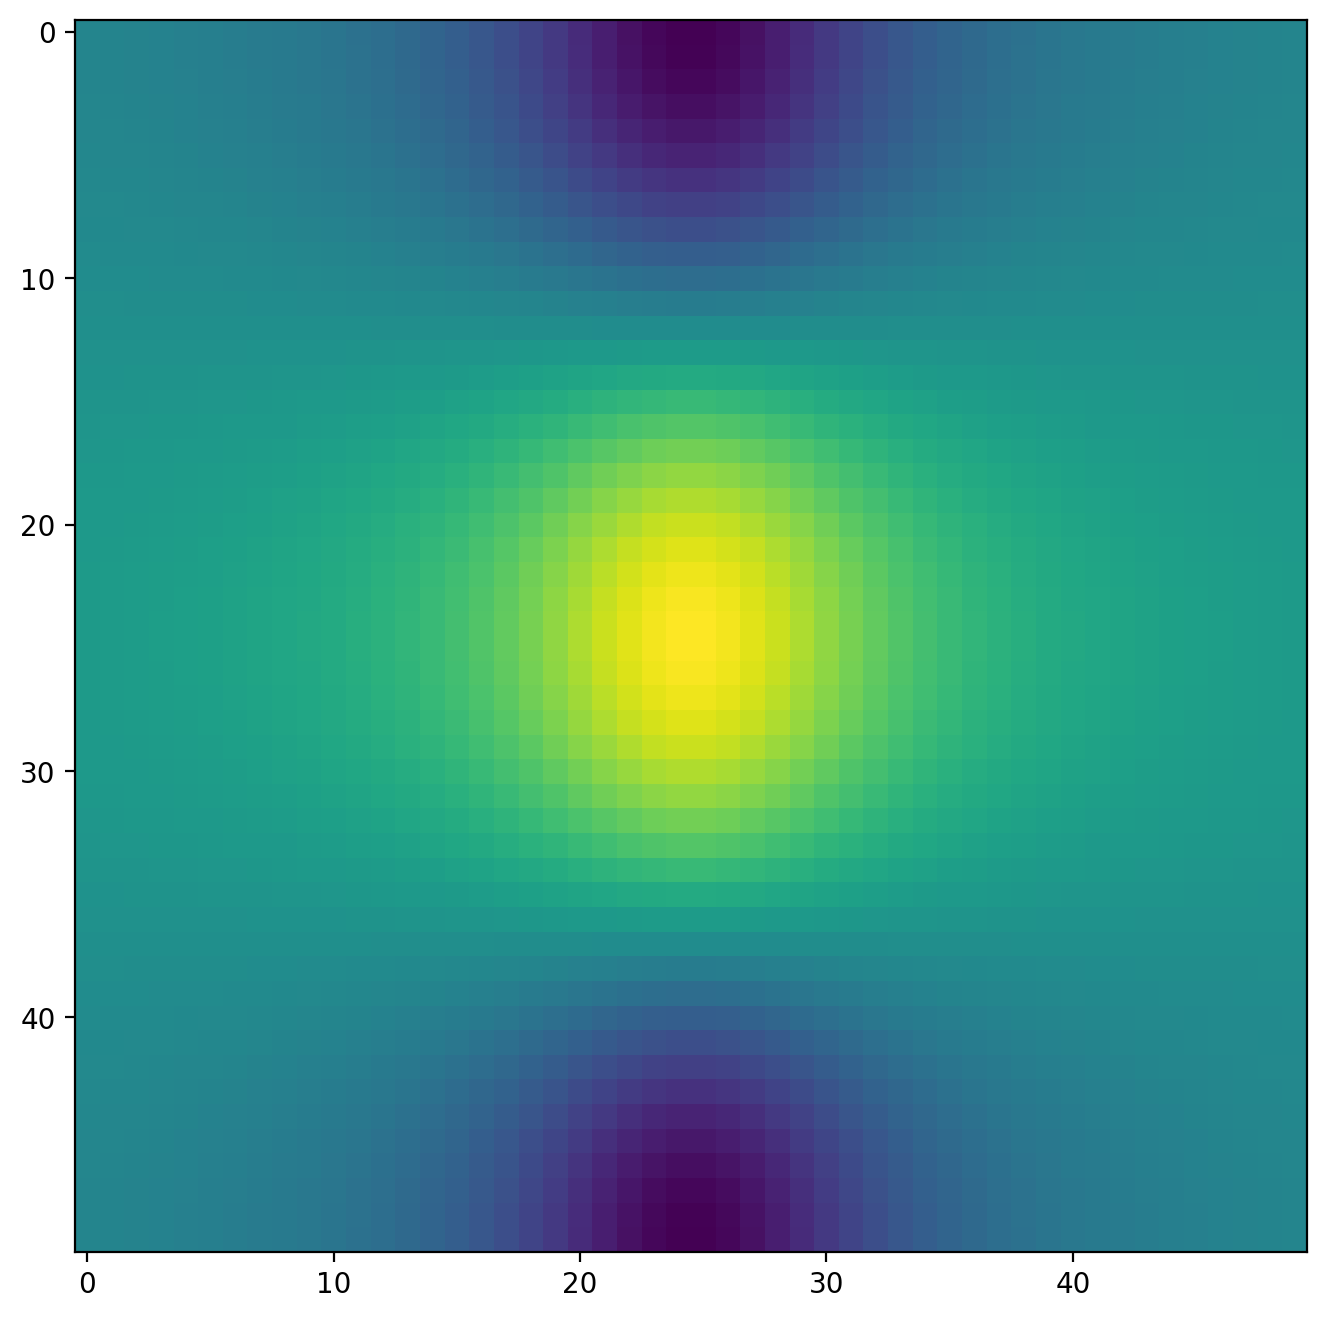

In [38]:
fig, ax = subplots(figsize=(8, 8))
ax.imshow(f);

## 2.3.6 Indexing Data

In [39]:
A = np.array(np.arange(16)).reshape((4, 4))
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [40]:
A[1, 2]

6

In [41]:
A[[1, 3]]

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15]])

In [42]:
A[:, [0,2]]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14]])

In [43]:
A[[1, 3], [0, 2]]

array([ 4, 14])

In [44]:
A[[1,3]][:,[0,2]]

array([[ 4,  6],
       [12, 14]])

In [45]:
idx = np.ix_([1,3], [0,2,3])
A[idx]

array([[ 4,  6,  7],
       [12, 14, 15]])

In [46]:
A[1:4:2, 0:3:2]

array([[ 4,  6],
       [12, 14]])

### Boolean Indexing

In [48]:
keep_rows = np.zeros(A.shape[0], bool)
keep_rows

array([False, False, False, False])

In [49]:
keep_rows[[1,3]] = True
keep_rows

array([False,  True, False,  True])

In [50]:
np.all(keep_rows == np.array([0,1,0,1]))

True

In [51]:
A[np.array([0,1,0,1])]

array([[0, 1, 2, 3],
       [4, 5, 6, 7],
       [0, 1, 2, 3],
       [4, 5, 6, 7]])

In [52]:
A[keep_rows]

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15]])

In [53]:
keep_cols = np.zeros(A.shape[1], bool)
keep_cols[[0,2,3]] = True
idx_bool = np.ix_(keep_rows, keep_cols)
A[idx_bool]

array([[ 4,  6,  7],
       [12, 14, 15]])

In [54]:
idx_mixed = np.ix_([1,3], keep_cols)
A[idx_mixed]

array([[ 4,  6,  7],
       [12, 14, 15]])

## 2.3.7 Loading Data

### Reading in a Data Set

In [55]:
import pandas as pd
Auto = pd.read_csv('./data/Auto.csv')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [56]:
Auto['horsepower']

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 397, dtype: object

In [57]:
np.unique(Auto['horsepower'])

array(['100', '102', '103', '105', '107', '108', '110', '112', '113',
       '115', '116', '120', '122', '125', '129', '130', '132', '133',
       '135', '137', '138', '139', '140', '142', '145', '148', '149',
       '150', '152', '153', '155', '158', '160', '165', '167', '170',
       '175', '180', '190', '193', '198', '200', '208', '210', '215',
       '220', '225', '230', '46', '48', '49', '52', '53', '54', '58',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '?'], dtype=object)

In [59]:
Auto = pd.read_csv('Auto.csv',
                   na_values=['?'])
Auto['horsepower'].sum()

40952.0

In [60]:
Auto.shape

(397, 9)

In [61]:
Auto_new = Auto.dropna()
Auto_new.shape

(392, 9)

### Basics of Selecting Rows and Columns

In [62]:
Auto = Auto_new
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [63]:
Auto[:3]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite


In [65]:
idx_80 = Auto['year'] > 80
Auto[idx_80]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
338,27.2,4,135.0,84.0,2490,15.7,81,1,plymouth reliant
339,26.6,4,151.0,84.0,2635,16.4,81,1,buick skylark
340,25.8,4,156.0,92.0,2620,14.4,81,1,dodge aries wagon (sw)
341,23.5,6,173.0,110.0,2725,12.6,81,1,chevrolet citation
342,30.0,4,135.0,84.0,2385,12.9,81,1,plymouth reliant
343,39.1,4,79.0,58.0,1755,16.9,81,3,toyota starlet
344,39.0,4,86.0,64.0,1875,16.4,81,1,plymouth champ
345,35.1,4,81.0,60.0,1760,16.1,81,3,honda civic 1300
346,32.3,4,97.0,67.0,2065,17.8,81,3,subaru
347,37.0,4,85.0,65.0,1975,19.4,81,3,datsun 210 mpg


In [66]:
Auto[['mpg', 'horsepower']]

,mpg,horsepower
0,18.0,130.0
1,15.0,165.0
2,18.0,150.0
3,16.0,150.0
4,17.0,140.0
...,...,...
392,27.0,86.0
393,44.0,52.0
394,32.0,84.0
395,28.0,79.0


In [67]:
Auto.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       387, 388, 389, 390, 391, 392, 393, 394, 395, 396],
      dtype='int64', length=392)

In [68]:
Auto_re = Auto.set_index('name')
Auto_re

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1


In [69]:
Auto_re.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [70]:
rows = ['amc rebel sst', 'ford torino']
Auto_re.loc[rows]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [73]:
Auto_re.iloc[[3,4]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [74]:
Auto_re.iloc[:, [0,2,3]]

,mpg,displacement,horsepower
name,,,
chevrolet chevelle malibu,18.0,307.0,130.0
buick skylark 320,15.0,350.0,165.0
plymouth satellite,18.0,318.0,150.0
amc rebel sst,16.0,304.0,150.0
ford torino,17.0,302.0,140.0
...,...,...,...
ford mustang gl,27.0,140.0,86.0
vw pickup,44.0,97.0,52.0
dodge rampage,32.0,135.0,84.0


In [75]:
Auto_re.iloc[[3,4], [0,2,3]]

,mpg,displacement,horsepower
name,,,
amc rebel sst,16.0,304.0,150.0
ford torino,17.0,302.0,140.0


In [77]:
Auto_re.loc['ford galaxie 500', ['mpg', 'origin', 'year']]

,mpg,origin,year
name,,,
ford galaxie 500,15.0,1,70
ford galaxie 500,14.0,1,71
ford galaxie 500,14.0,1,72


### More on Selecting Rows and Columns

In [78]:
idx_80 = Auto_re['year'] > 80
Auto_re.loc[idx_80, ['weight', 'origin']]

,weight,origin
name,,
plymouth reliant,2490,1
buick skylark,2635,1
dodge aries wagon (sw),2620,1
chevrolet citation,2725,1
plymouth reliant,2385,1
toyota starlet,1755,3
plymouth champ,1875,1
honda civic 1300,1760,3
subaru,2065,3


In [79]:
Auto_re.loc[lambda df: df['year'] > 80, ['weight', 'origin']]

,weight,origin
name,,
plymouth reliant,2490,1
buick skylark,2635,1
dodge aries wagon (sw),2620,1
chevrolet citation,2725,1
plymouth reliant,2385,1
toyota starlet,1755,3
plymouth champ,1875,1
honda civic 1300,1760,3
subaru,2065,3


In [80]:
Auto_re.loc[lambda df: (df['year'] > 80) & (df['mpg'] > 30),
            ['weight', 'origin']
            ]

,weight,origin
name,,
toyota starlet,1755,3
plymouth champ,1875,1
honda civic 1300,1760,3
subaru,2065,3
datsun 210 mpg,1975,3
toyota tercel,2050,3
mazda glc 4,1985,3
plymouth horizon 4,2215,1
ford escort 4w,2045,1


In [81]:
Auto_re.loc[
    lambda df: (df['displacement'] < 300)
                & (df.index.str.contains('ford'))
                | df.index.str.contains('datsun'),
    ['weight', 'origin']
]

,weight,origin
name,,
ford maverick,2587,1
datsun pl510,2130,3
datsun pl510,2130,3
ford torino 500,3302,1
ford mustang,3139,1
datsun 1200,1613,3
ford pinto runabout,2226,1
ford pinto (sw),2395,1
datsun 510 (sw),2288,3


## For Loops

In [82]:
total = 0
for value, weight in zip([2,3,19],
                         [0.2, 0.3, 0.5]):
    total += weight * value
print('Weighted average is: {0}'.format(total))

Weighted average is: 10.8


### String Formatting

In [83]:
rng = np.random.default_rng(1)
A = rng.standard_normal((127, 5))
M = rng.choice([0, np.nan], p=[0.8, 0.2], size=A.shape)
A += M
D = pd.DataFrame(A, columns=['food',
                             'bar',
                             'pickle',
                             'snack',
                             'popcorn'])
D[:3]

,food,bar,pickle,snack,popcorn
0,0.345584,0.821618,0.330437,-1.303157,NaN
1,NaN,-0.536953,0.581118,0.364572,0.294132
2,NaN,0.546713,NaN,-0.162910,-0.482119


In [86]:
for col in D.columns:
    template = 'Column "{0}" has {1:.2%} missing values'
    print(template.format(col, np.isnan(D[col]).mean()))

Column "food" has 16.54% missing values
Column "bar" has 25.98% missing values
Column "pickle" has 29.13% missing values
Column "snack" has 21.26% missing values
Column "popcorn" has 22.83% missing values


## Additional Graphical and Numerical Summaries

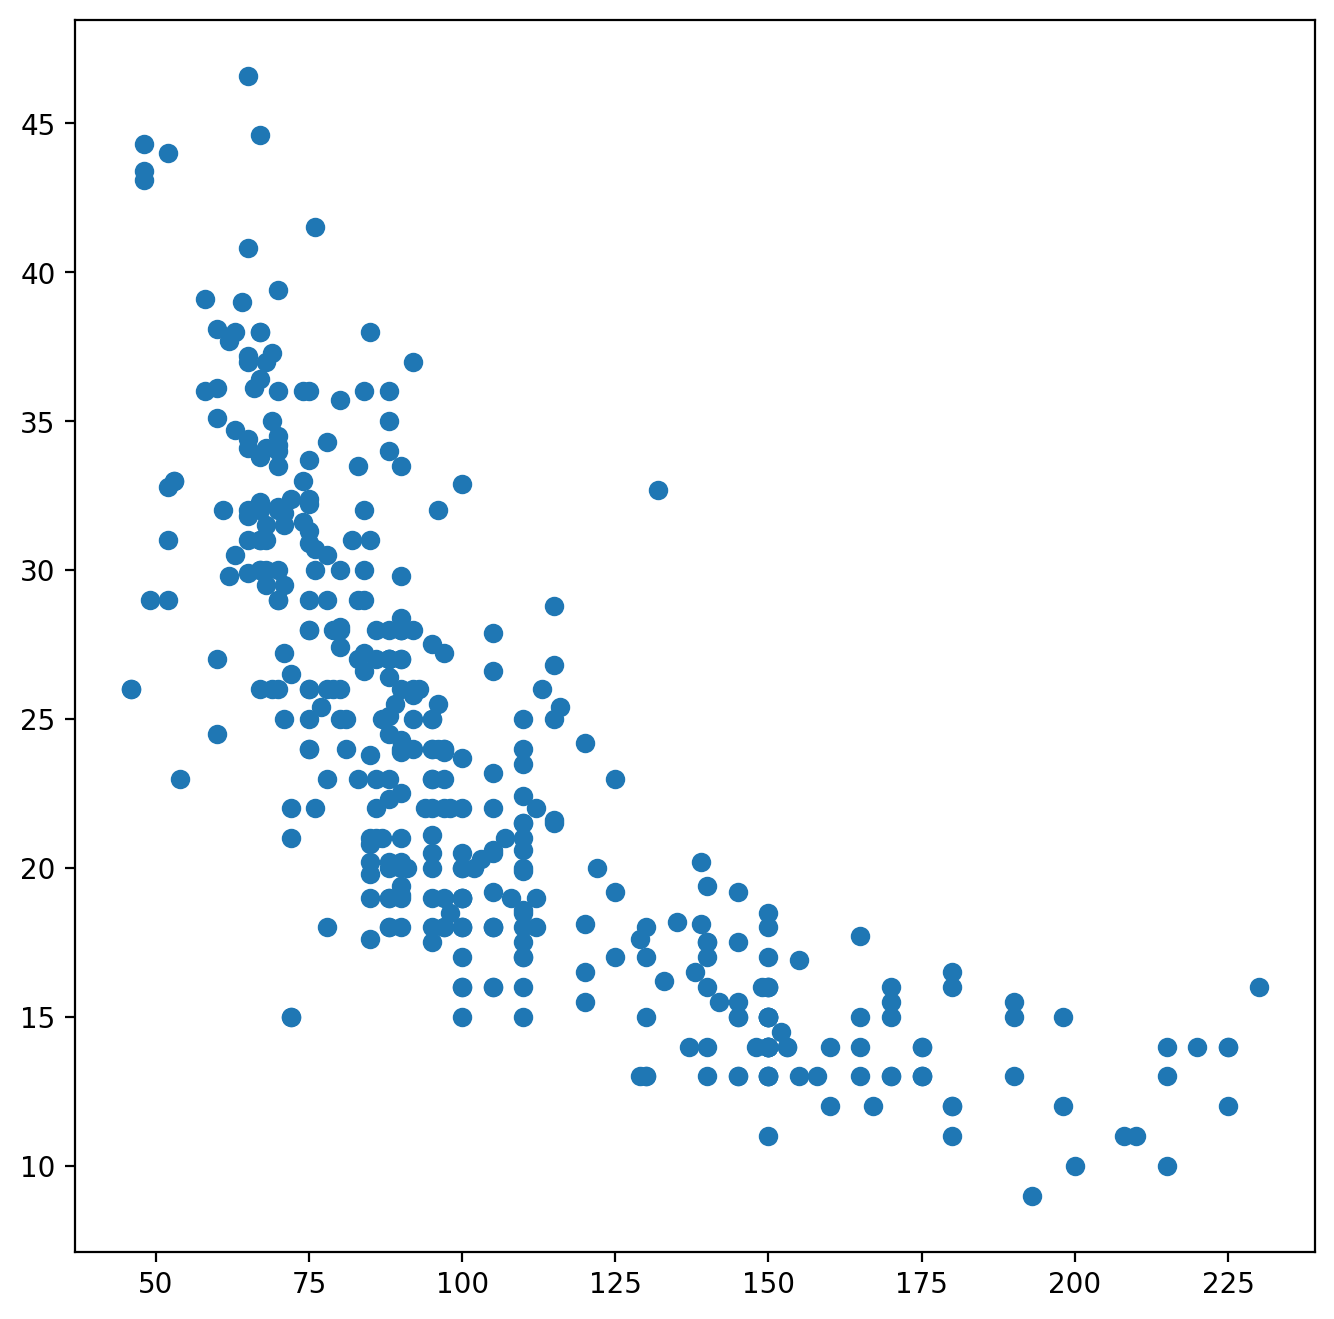

In [88]:
fig, ax = subplots(figsize=(8, 8))
ax.plot(Auto['horsepower'], Auto['mpg'], 'o');

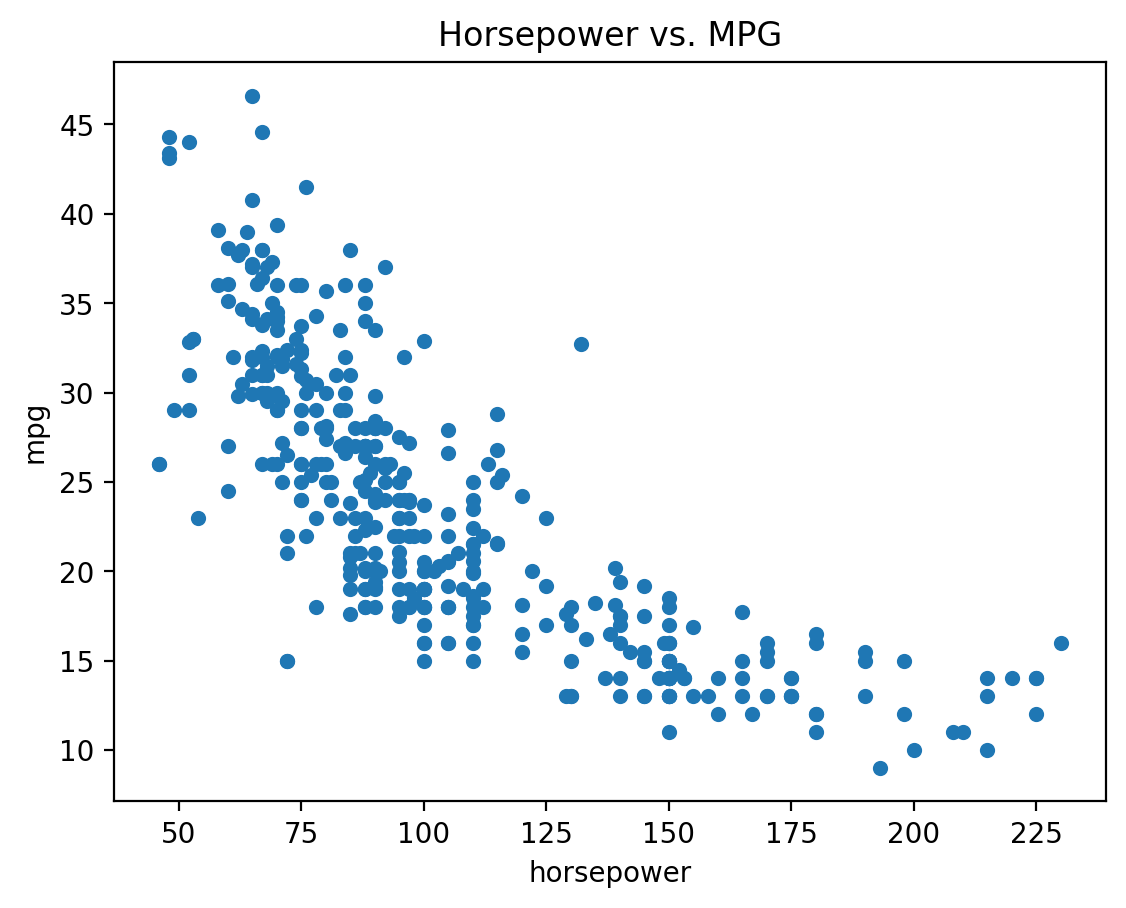

In [104]:
ax = Auto.plot.scatter('horsepower', 'mpg')
ax.set_title('Horsepower vs. MPG');

In [95]:
fig = ax.figure
fig.savefig('horsepower_mpg.png')

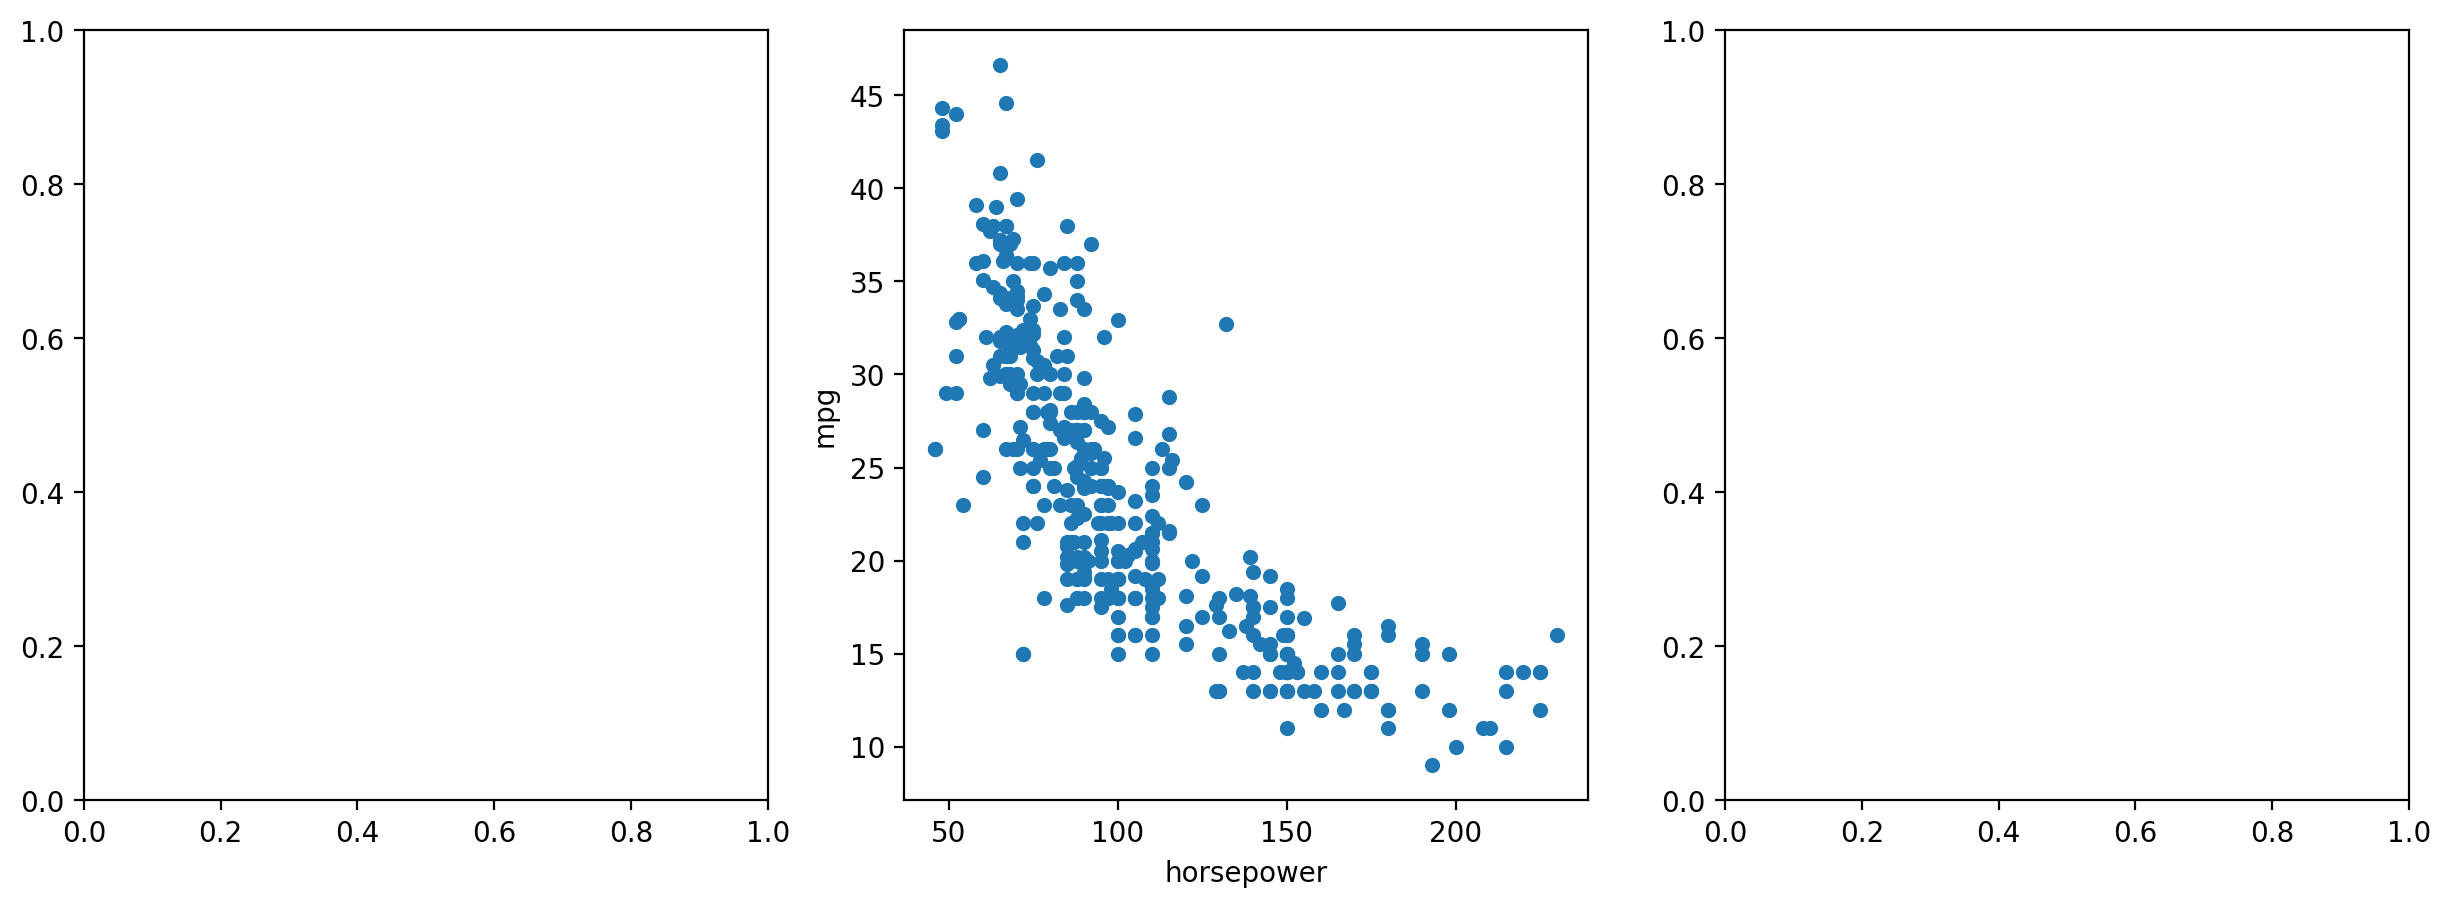

In [96]:
fig, axes = subplots(ncols=3, figsize=(15, 5))
Auto.plot.scatter('horsepower', 'mpg', ax=axes[1]);

In [97]:
Auto.horsepower

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
392     86.0
393     52.0
394     84.0
395     79.0
396     82.0
Name: horsepower, Length: 392, dtype: float64

In [98]:
Auto.cylinders.dtype

dtype('int64')

In [100]:
np.unique(Auto.cylinders)

array([3, 4, 5, 6, 8])

In [101]:
Auto.cylinders = pd.Series(Auto.cylinders, dtype='category')
Auto.cylinders.dtype

CategoricalDtype(categories=[3, 4, 5, 6, 8], ordered=False, categories_dtype=int64)

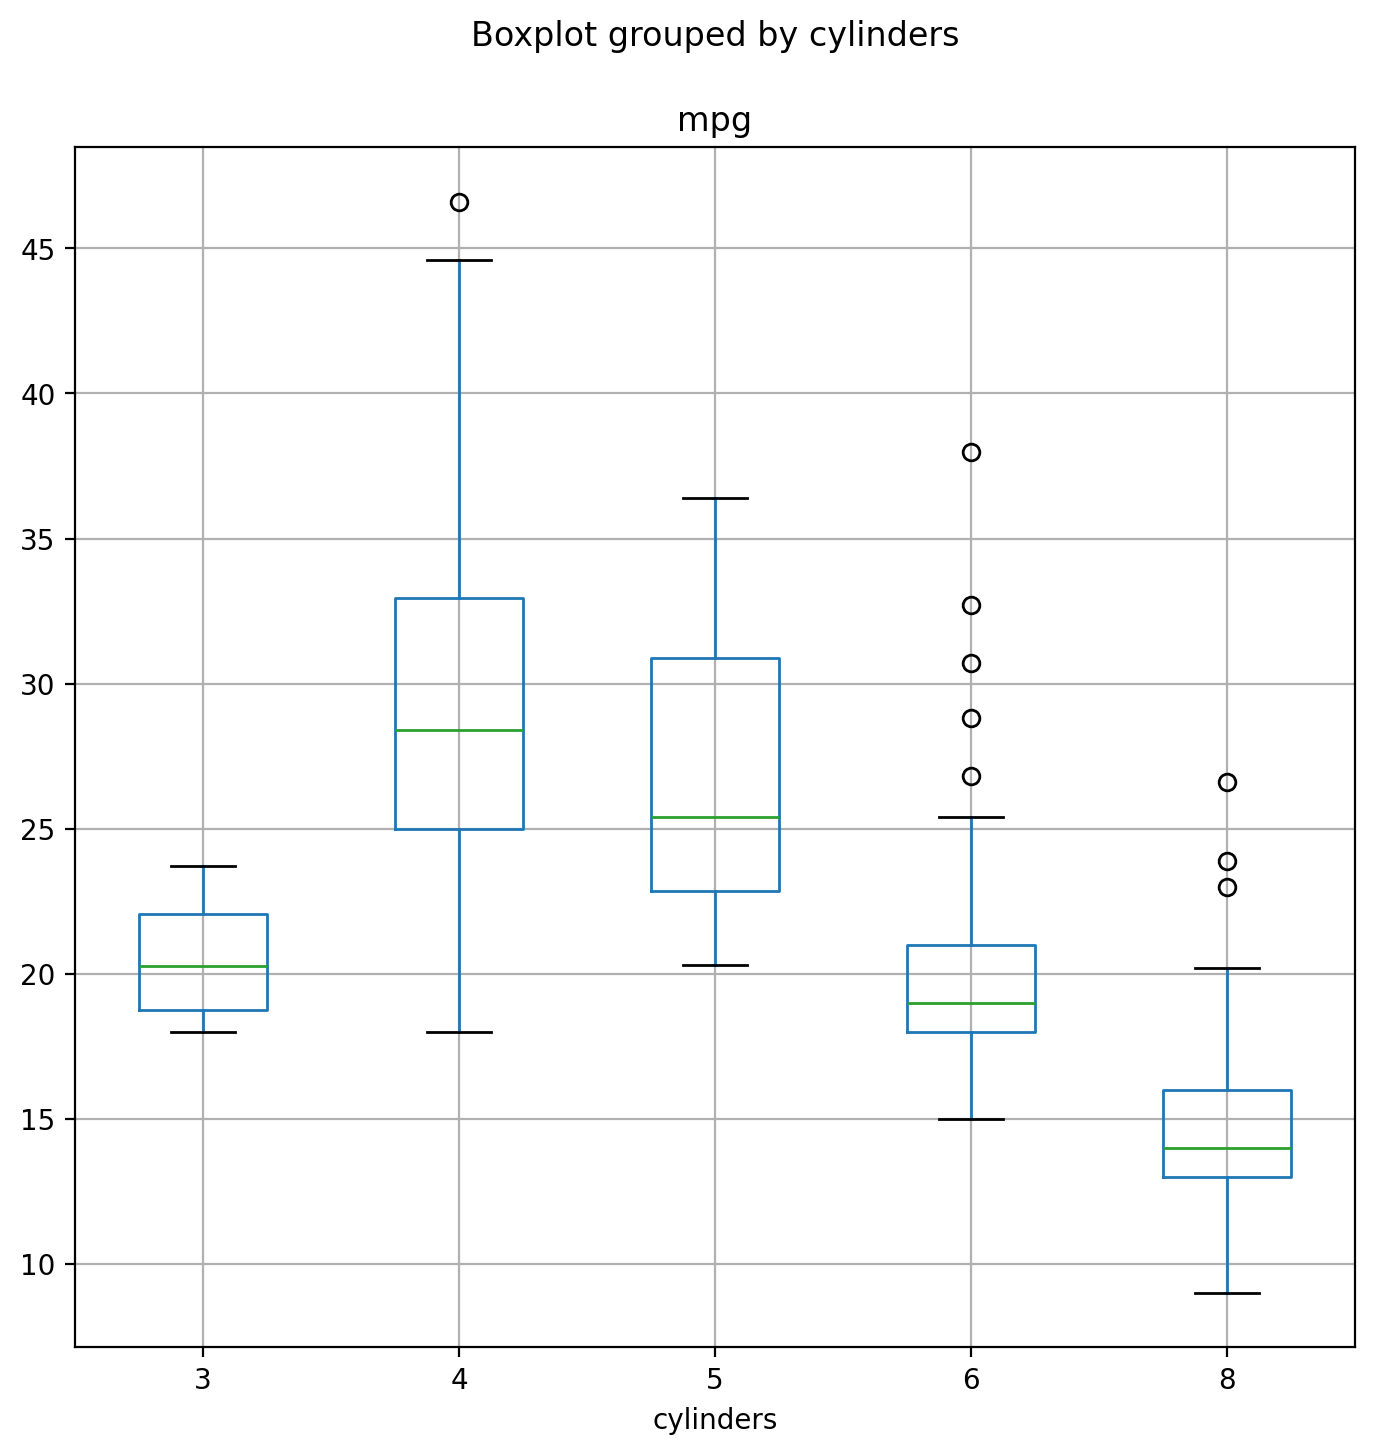

In [105]:
fig, ax = subplots(figsize=(8, 8))
Auto.boxplot('mpg', by='cylinders', ax=ax);

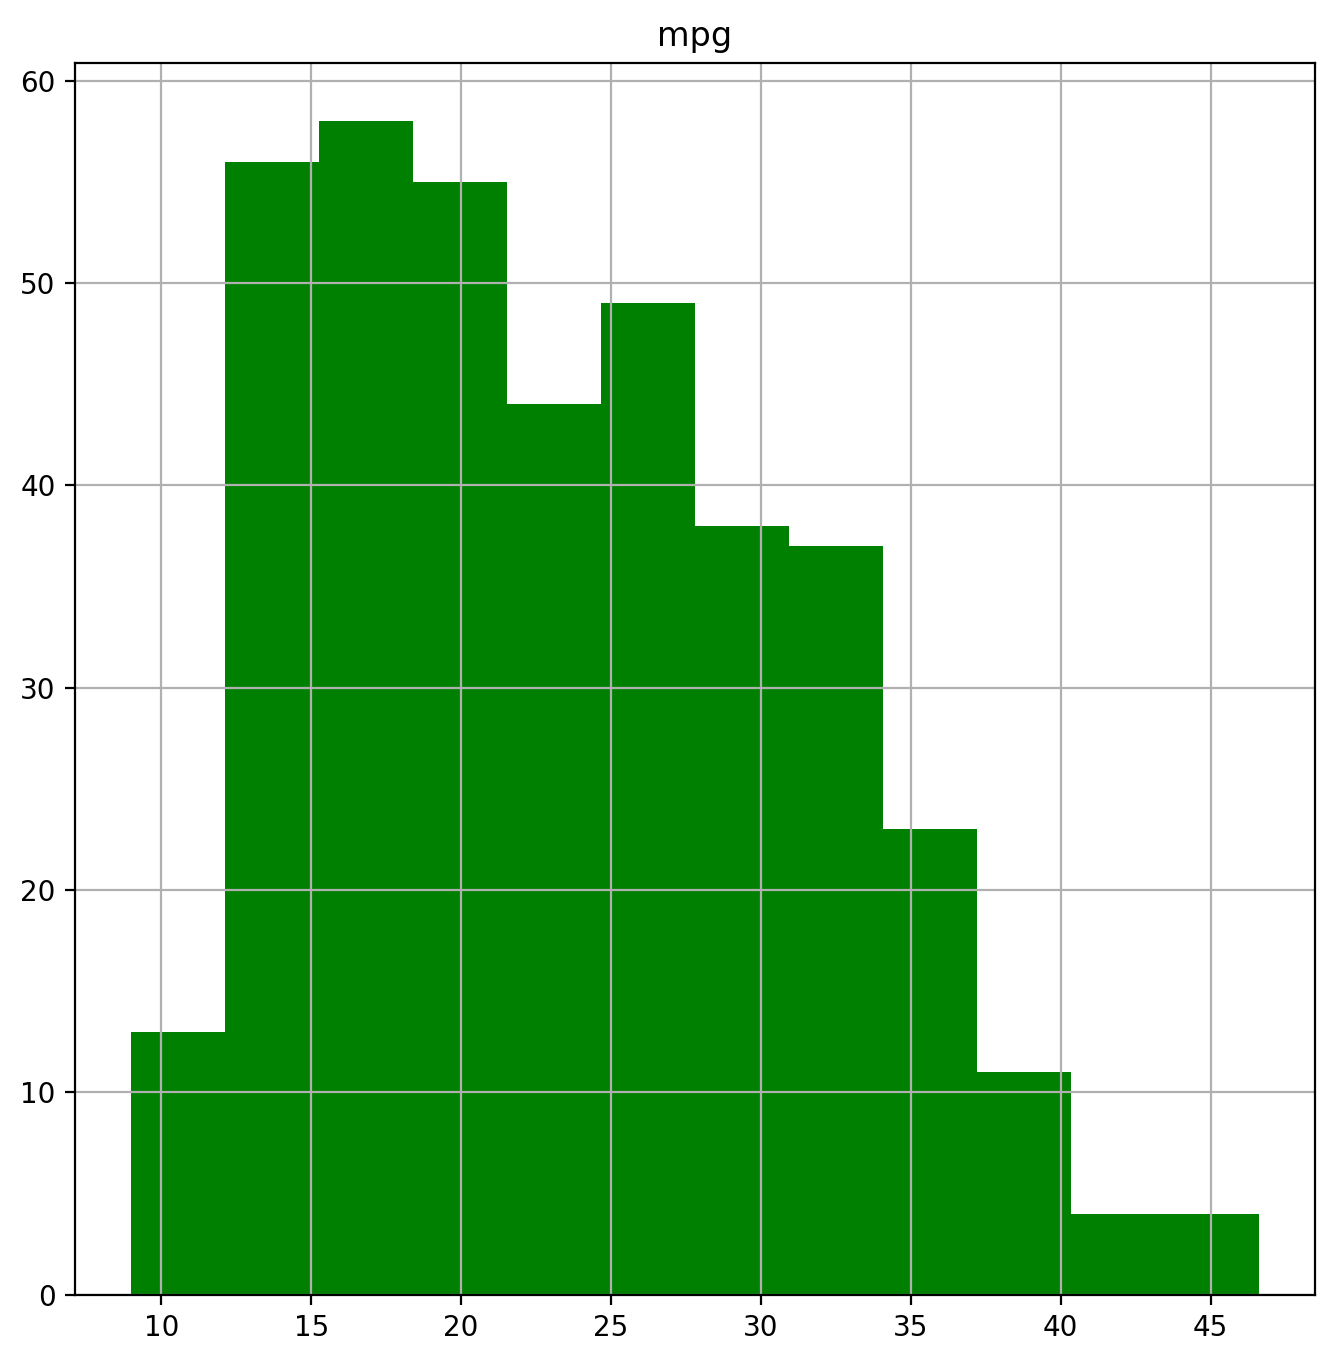

In [107]:
fig, ax = subplots(figsize=(8, 8))
Auto.hist('mpg', color='green', bins=12, ax=ax);

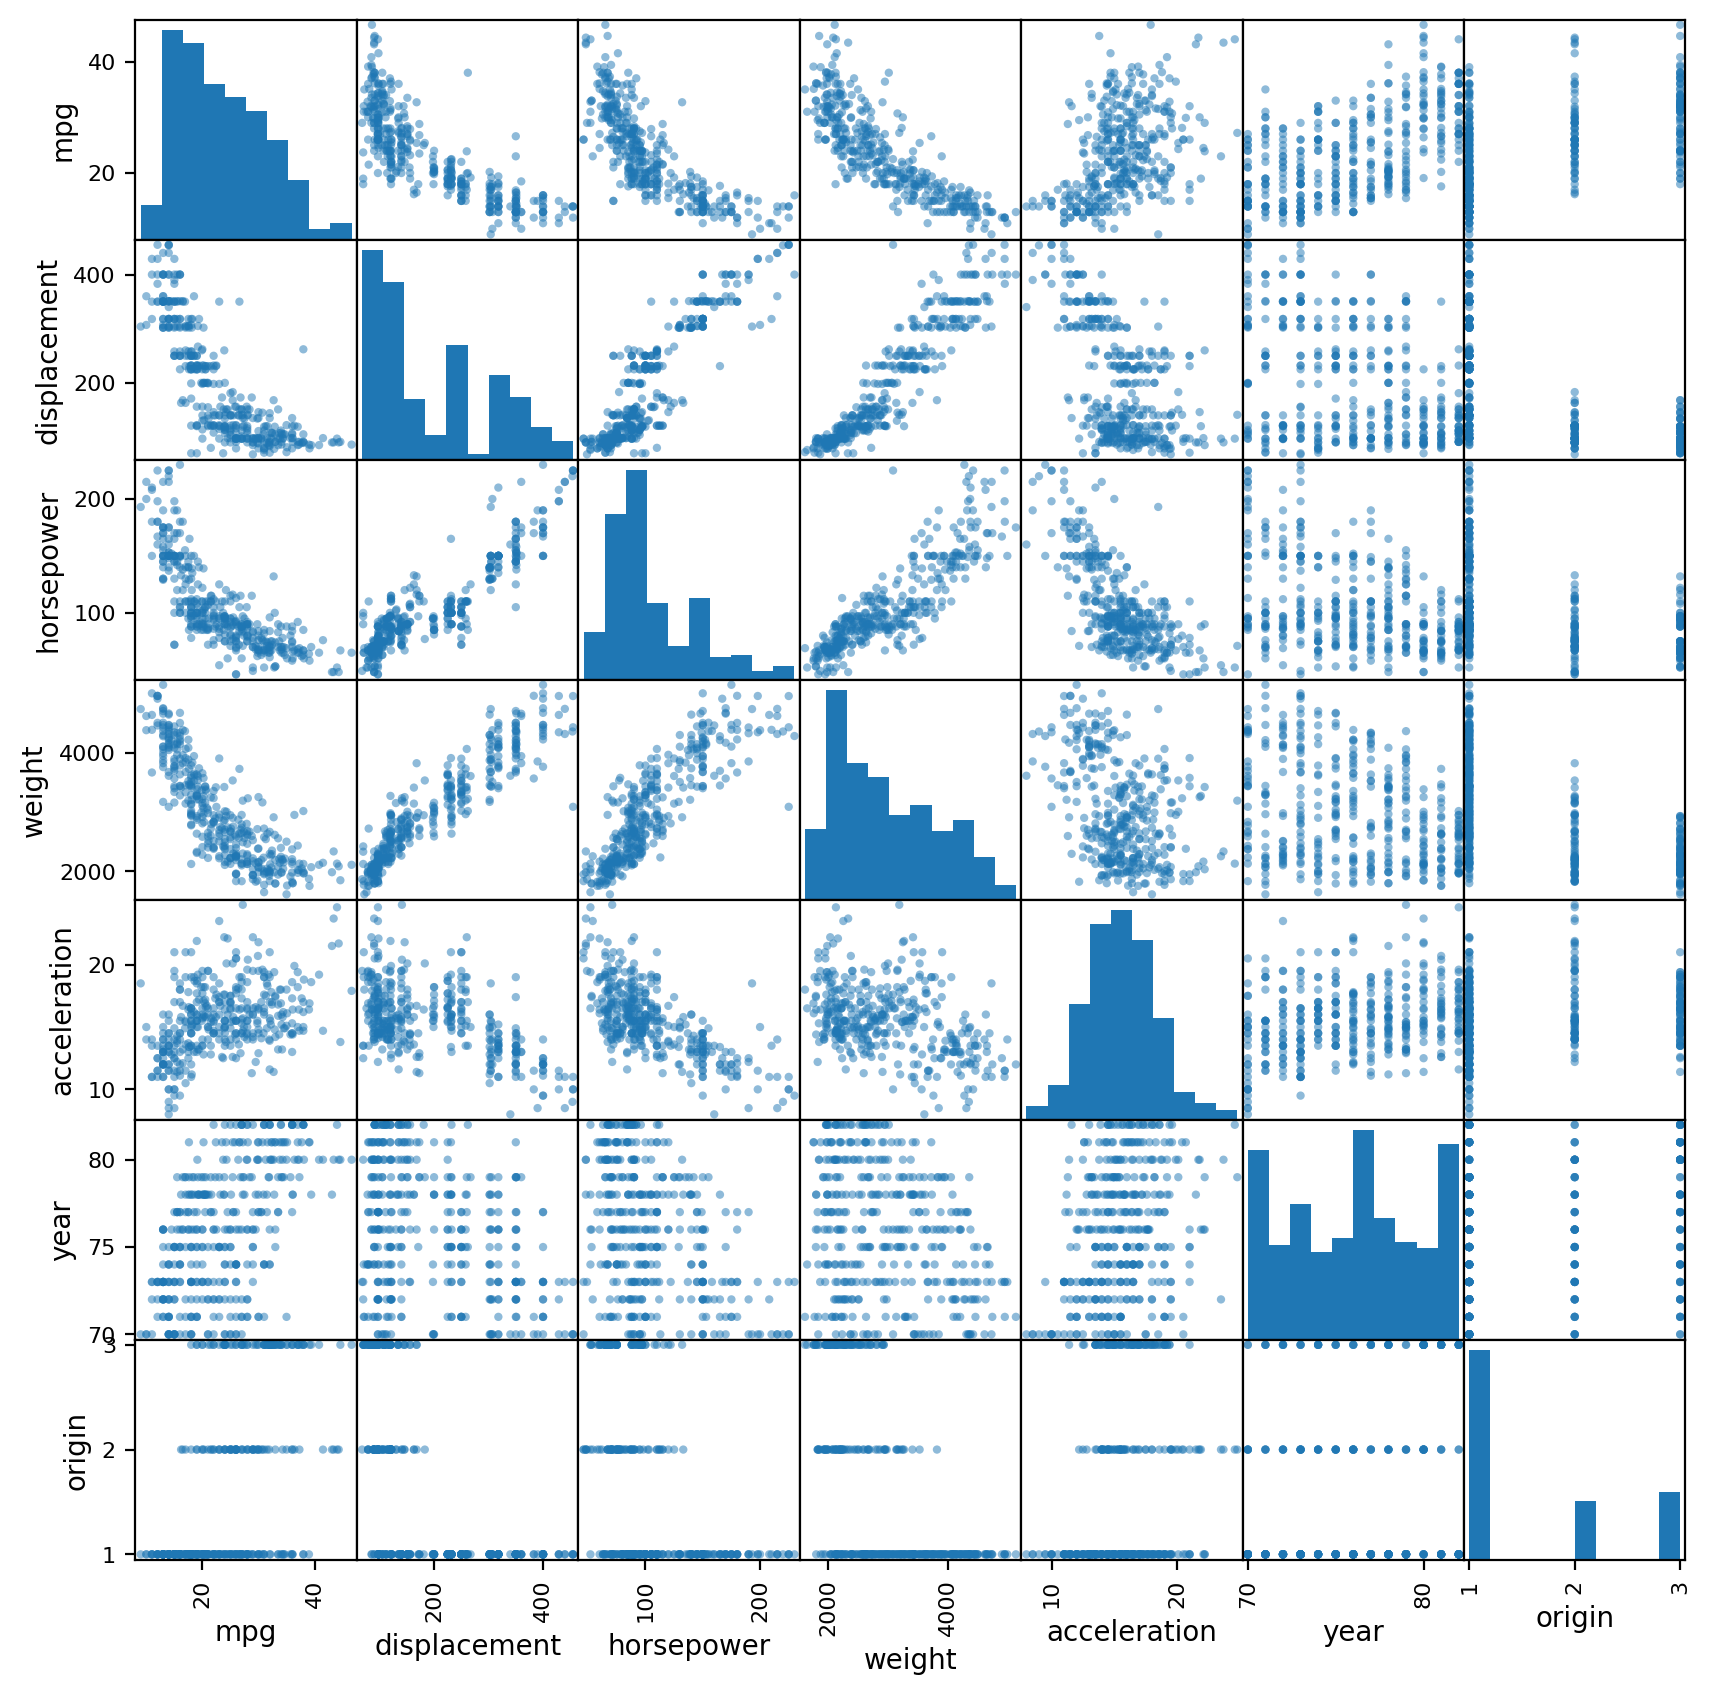

In [115]:
fig, axes = subplots(nrows=7, ncols=7, figsize=(10, 10))
pd.plotting.scatter_matrix(Auto, ax=axes);

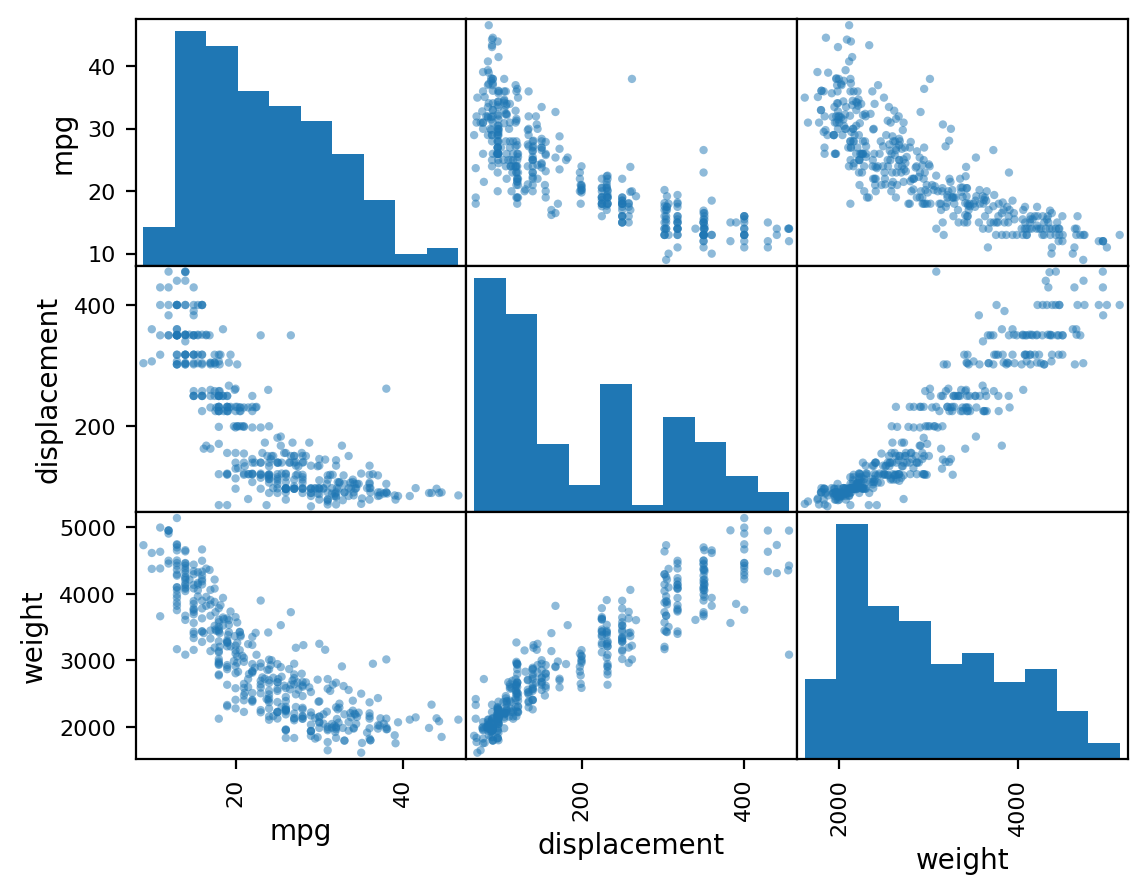

In [118]:
pd.plotting.scatter_matrix(Auto[['mpg',
                                 'displacement',
                                 'weight']]);

In [119]:
Auto[['mpg', 'weight']].describe()

,mpg,weight
count,392.000000,392.000000
mean,23.445918,2977.584184
std,7.805007,849.402560
min,9.000000,1613.000000
25%,17.000000,2225.250000
50%,22.750000,2803.500000
75%,29.000000,3614.750000
max,46.600000,5140.000000


In [125]:
Auto['cylinders'].describe()

count     392
unique      5
top         4
freq      199
Name: cylinders, dtype: int64

In [124]:
Auto['mpg'].describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64